In [78]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rdf
from itertools import combinations
from functools import reduce
import pandas as pd

import warnings
warnings.simplefilter("ignore", category=np.VisibleDeprecationWarning)

TPR = 'md_0_sim_resp_24trp_500ns.tpr'
XTC = 'md_0_sim_resp_24trp_500ns_pbc_center.xtc'

# Load the trajectory and topology
u = mda.Universe(TPR, XTC)

trp = u.select_atoms("resname TRP")

trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")




final_clusters = []

for ts in u.trajectory[5000:]:

    clust_arr = np.zeros(24)
    trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
    cutoff_2 = 7.5
    all_clust = []
    for i in range(0, len(trp_coms)-1):
        clust = [i]
        for j in range(i+1, len(trp_coms)):
            dist = np.linalg.norm(trp_coms[i] - trp_coms[j])
            if dist <= cutoff_2:
                clust.append(j)
        if (len(clust) > 1):
            all_clust.append(clust)
    # print(all_clust)
    
    if (len(all_clust) > 1):
        i = 0
        j = 0
        while i < len(all_clust) - 1:        
            intersect_clust = all_clust[i]
            while len(intersect_clust) != 0 and i < (len(all_clust) - 1):
                i += 1 
                intersect_clust = np.intersect1d(intersect_clust, all_clust[i]) 
            all_list = [m for m in all_clust[j:i]]  
            union_clust = reduce(np.union1d, all_list) 
            clust_arr[len(union_clust) - 1] += 1
            final_clusters.append(clust_arr)
            j = i
        
    else:
        size = len(all_clust)
        if size == 0:
            clust_arr[0] += 1
            final_clusters.append(clust_arr)
        else:
            id = len(all_clust[0]) - 1
            clust_arr[id] += 1
            final_clusters.append(clust_arr)

final_clusters = np.array(final_clusters)

df = pd.DataFrame(final_clusters)
average_clusters = df.mean(axis=0)

In [79]:
df = pd.DataFrame(final_clusters)
average_clusters = df.mean(axis=0)
print(average_clusters)

0     0.057310
1     1.774325
2     0.200713
3     0.020759
4     0.003439
5     0.000255
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
dtype: float64


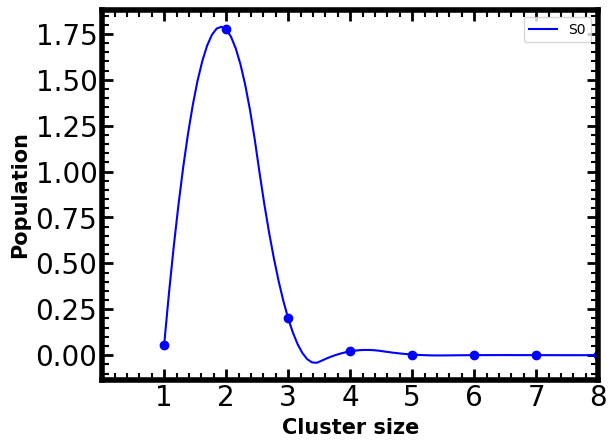

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

bins = np.linspace(1, 24, endpoint=True, num=24)
bins_new = np.linspace(bins.min(), bins.max(), 300)
spl = make_interp_spline(bins, average_clusters, k=2)
# spl1 = make_interp_spline(bins, average_clusters_mnt, k=2)
smooth_values = spl(bins_new)
# smooth_values1 = spl1(bins_new)

plt.plot(bins, average_clusters, 'o', c='blue')
plt.plot(bins_new, smooth_values, label='S0', c='blue')
# plt.plot(bins, average_clusters_mnt, 'o', c='red')
# plt.plot(bins_new, smooth_values1, label='S1', c='red')
plt.legend()
plt.xlabel('Cluster size',fontweight='bold', fontsize=15)
plt.ylabel('Population',fontweight='bold',fontsize=15)
x_values = np.linspace(1, 24, endpoint=True, num=24)
plt.xticks(ticks=x_values)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', direction='in', length=8, width=3)
plt.tick_params(axis='both', which='minor', direction='in', length=4, width=2)
plt.gca().tick_params(bottom=True, top=True, left=True, right=True,axis='both', which='minor', direction='in', length=5, width=1.5)
plt.gca().tick_params(bottom=True, top=True, left=True, right=True,axis='both', which='major', direction='in', length=8, width=2)
plt.gca().spines['top'].set_linewidth(4)
plt.gca().spines['right'].set_linewidth(4)
plt.gca().spines['left'].set_linewidth(4)
plt.gca().spines['bottom'].set_linewidth(4)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,8)
# plt.savefig('clust_size_100mM-mnt.png', dpi=1000)
plt.show()
plt.show()
plt.show()

In [108]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rdf
from itertools import combinations
from functools import reduce
import pandas as pd

import warnings
warnings.simplefilter("ignore", category=np.VisibleDeprecationWarning)

# TPR = 'md_0_sim_resp_24trp-1sbt_500ns.tpr'
# XTC = 'md_0_sim_resp_24trp-1sbt_500ns_pbc_center.xtc'
TPR = 'md_0_sim_resp_24trp-1ta_500ns.tpr'
XTC = 'md_0_sim_resp_24trp-1ta_500ns_pbc_center.xtc'
# Load the trajectory and topology
u = mda.Universe(TPR, XTC)

# Select TRP and TA atoms
trp = u.select_atoms("resname TRP")
ta = u.select_atoms("resname TA5")

# Calculate the center of mass (COM) of TRP and TA molecules
trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
ta_coms = ta.center_of_mass(unwrap=True, compound="fragments")


final_clusters = []

for ts in u.trajectory[5000:]:

    clust_arr = np.zeros(24)
    # Calculate distances from TA to all TRPs and store them in dist1
    trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
    ta_coms = ta.center_of_mass(unwrap=True, compound="fragments")
    dist1 = []
    for i in trp_coms:
        dist1.append(np.linalg.norm(i-ta_coms[0]))
    #print(dist1)
    
    # Identify TRPs outside cutoff
    cutoff_1 = 15.0
    outside_trps_idxs = np.where(np.array(dist1) >= cutoff_1)[0]
    #print(outside_trps_idxs)
    
    # Identify cluster between only those TRPs outside TA
    outside_trps_pos = trp_coms[outside_trps_idxs]
    #print(outside_trps_pos)
    cutoff_2 = 7.5
    all_clust = []
    for i in range(0, len(outside_trps_idxs)-1):
        clust = [i]
        for j in range(i+1, len(outside_trps_idxs)):
            dist = np.linalg.norm(outside_trps_pos[i] - outside_trps_pos[j])
            if dist <= cutoff_2:
                clust.append(j)
        if (len(clust) > 1):
            all_clust.append(clust)
    # print(all_clust)
    
    if (len(all_clust) > 1):
        i = 0
        j = 0
        while i < len(all_clust) - 1:        
            intersect_clust = all_clust[i]
            while len(intersect_clust) != 0 and i < (len(all_clust) - 1):
                i += 1 
                intersect_clust = np.intersect1d(intersect_clust, all_clust[i]) 
            all_list = [m for m in all_clust[j:i]]  
            union_clust = reduce(np.union1d, all_list) 
            clust_arr[len(union_clust) - 1] += 1
            final_clusters.append(clust_arr)
            j = i
        
    else:
        size = len(all_clust)
        if size == 0:
            clust_arr[0] += 1
            final_clusters.append(clust_arr)
        else:
            id = len(all_clust[0]) - 1
            clust_arr[id] += 1
            final_clusters.append(clust_arr)

final_clusters = np.array(final_clusters)

In [109]:
df1 = pd.DataFrame(final_clusters)
average_clusters1 = df1.mean(axis=0)
print(average_clusters1)

0     0.236226
1     1.061837
2     0.112216
3     0.018366
4     0.004212
5     0.000505
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
dtype: float64


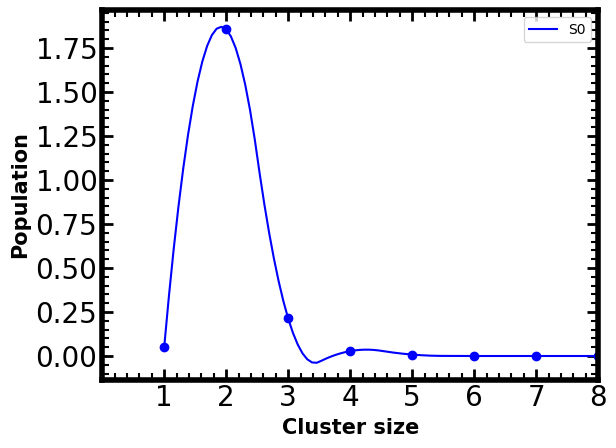

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

bins = np.linspace(1, 24, endpoint=True, num=24)
bins_new = np.linspace(bins.min(), bins.max(), 300)
spl = make_interp_spline(bins, average_clusters1, k=2)
# spl1 = make_interp_spline(bins, average_clusters_mnt, k=2)
smooth_values = spl(bins_new)
# smooth_values1 = spl1(bins_new)

plt.plot(bins, average_clusters1, 'o', c='blue')
plt.plot(bins_new, smooth_values, label='S0', c='blue')
# plt.plot(bins, average_clusters_mnt, 'o', c='red')
# plt.plot(bins_new, smooth_values1, label='S1', c='red')
plt.legend()
plt.xlabel('Cluster size',fontweight='bold', fontsize=15)
plt.ylabel('Population',fontweight='bold',fontsize=15)
x_values = np.linspace(1, 24, endpoint=True, num=24)
plt.xticks(ticks=x_values)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', direction='in', length=8, width=3)
plt.tick_params(axis='both', which='minor', direction='in', length=4, width=2)
plt.gca().tick_params(bottom=True, top=True, left=True, right=True,axis='both', which='minor', direction='in', length=5, width=1.5)
plt.gca().tick_params(bottom=True, top=True, left=True, right=True,axis='both', which='major', direction='in', length=8, width=2)
plt.gca().spines['top'].set_linewidth(4)
plt.gca().spines['right'].set_linewidth(4)
plt.gca().spines['left'].set_linewidth(4)
plt.gca().spines['bottom'].set_linewidth(4)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,8)
# plt.savefig('clust_size_100mM-24trp-ta.png', dpi=1000)
plt.show()
plt.show()
plt.show()

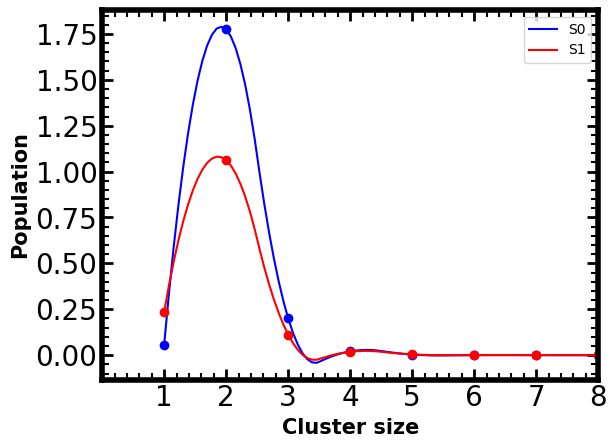

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

bins = np.linspace(1, 24, endpoint=True, num=24)
bins_new = np.linspace(bins.min(), bins.max(), 300)
spl = make_interp_spline(bins, average_clusters, k=2)
spl1 = make_interp_spline(bins, average_clusters1, k=2)
smooth_values = spl(bins_new)
smooth_values1 = spl1(bins_new)

plt.plot(bins, average_clusters, 'o', c='blue')
plt.plot(bins_new, smooth_values, label='S0', c='blue')
plt.plot(bins, average_clusters1, 'o', c='red')
plt.plot(bins_new, smooth_values1, label='S1', c='red')
plt.legend()
plt.xlabel('Cluster size',fontweight='bold', fontsize=15)
plt.ylabel('Population',fontweight='bold',fontsize=15)
x_values = np.linspace(1, 24, endpoint=True, num=24)
plt.xticks(ticks=x_values)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', direction='in', length=8, width=3)
plt.tick_params(axis='both', which='minor', direction='in', length=4, width=2)
plt.gca().tick_params(bottom=True, top=True, left=True, right=True,axis='both', which='minor', direction='in', length=5, width=1.5)
plt.gca().tick_params(bottom=True, top=True, left=True, right=True,axis='both', which='major', direction='in', length=8, width=2)
plt.gca().spines['top'].set_linewidth(4)
plt.gca().spines['right'].set_linewidth(4)
plt.gca().spines['left'].set_linewidth(4)
plt.gca().spines['bottom'].set_linewidth(4)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,8)
plt.savefig('clust_size_100mM-24trp-ta.png', dpi=1000)
plt.show()
plt.show()
plt.show()

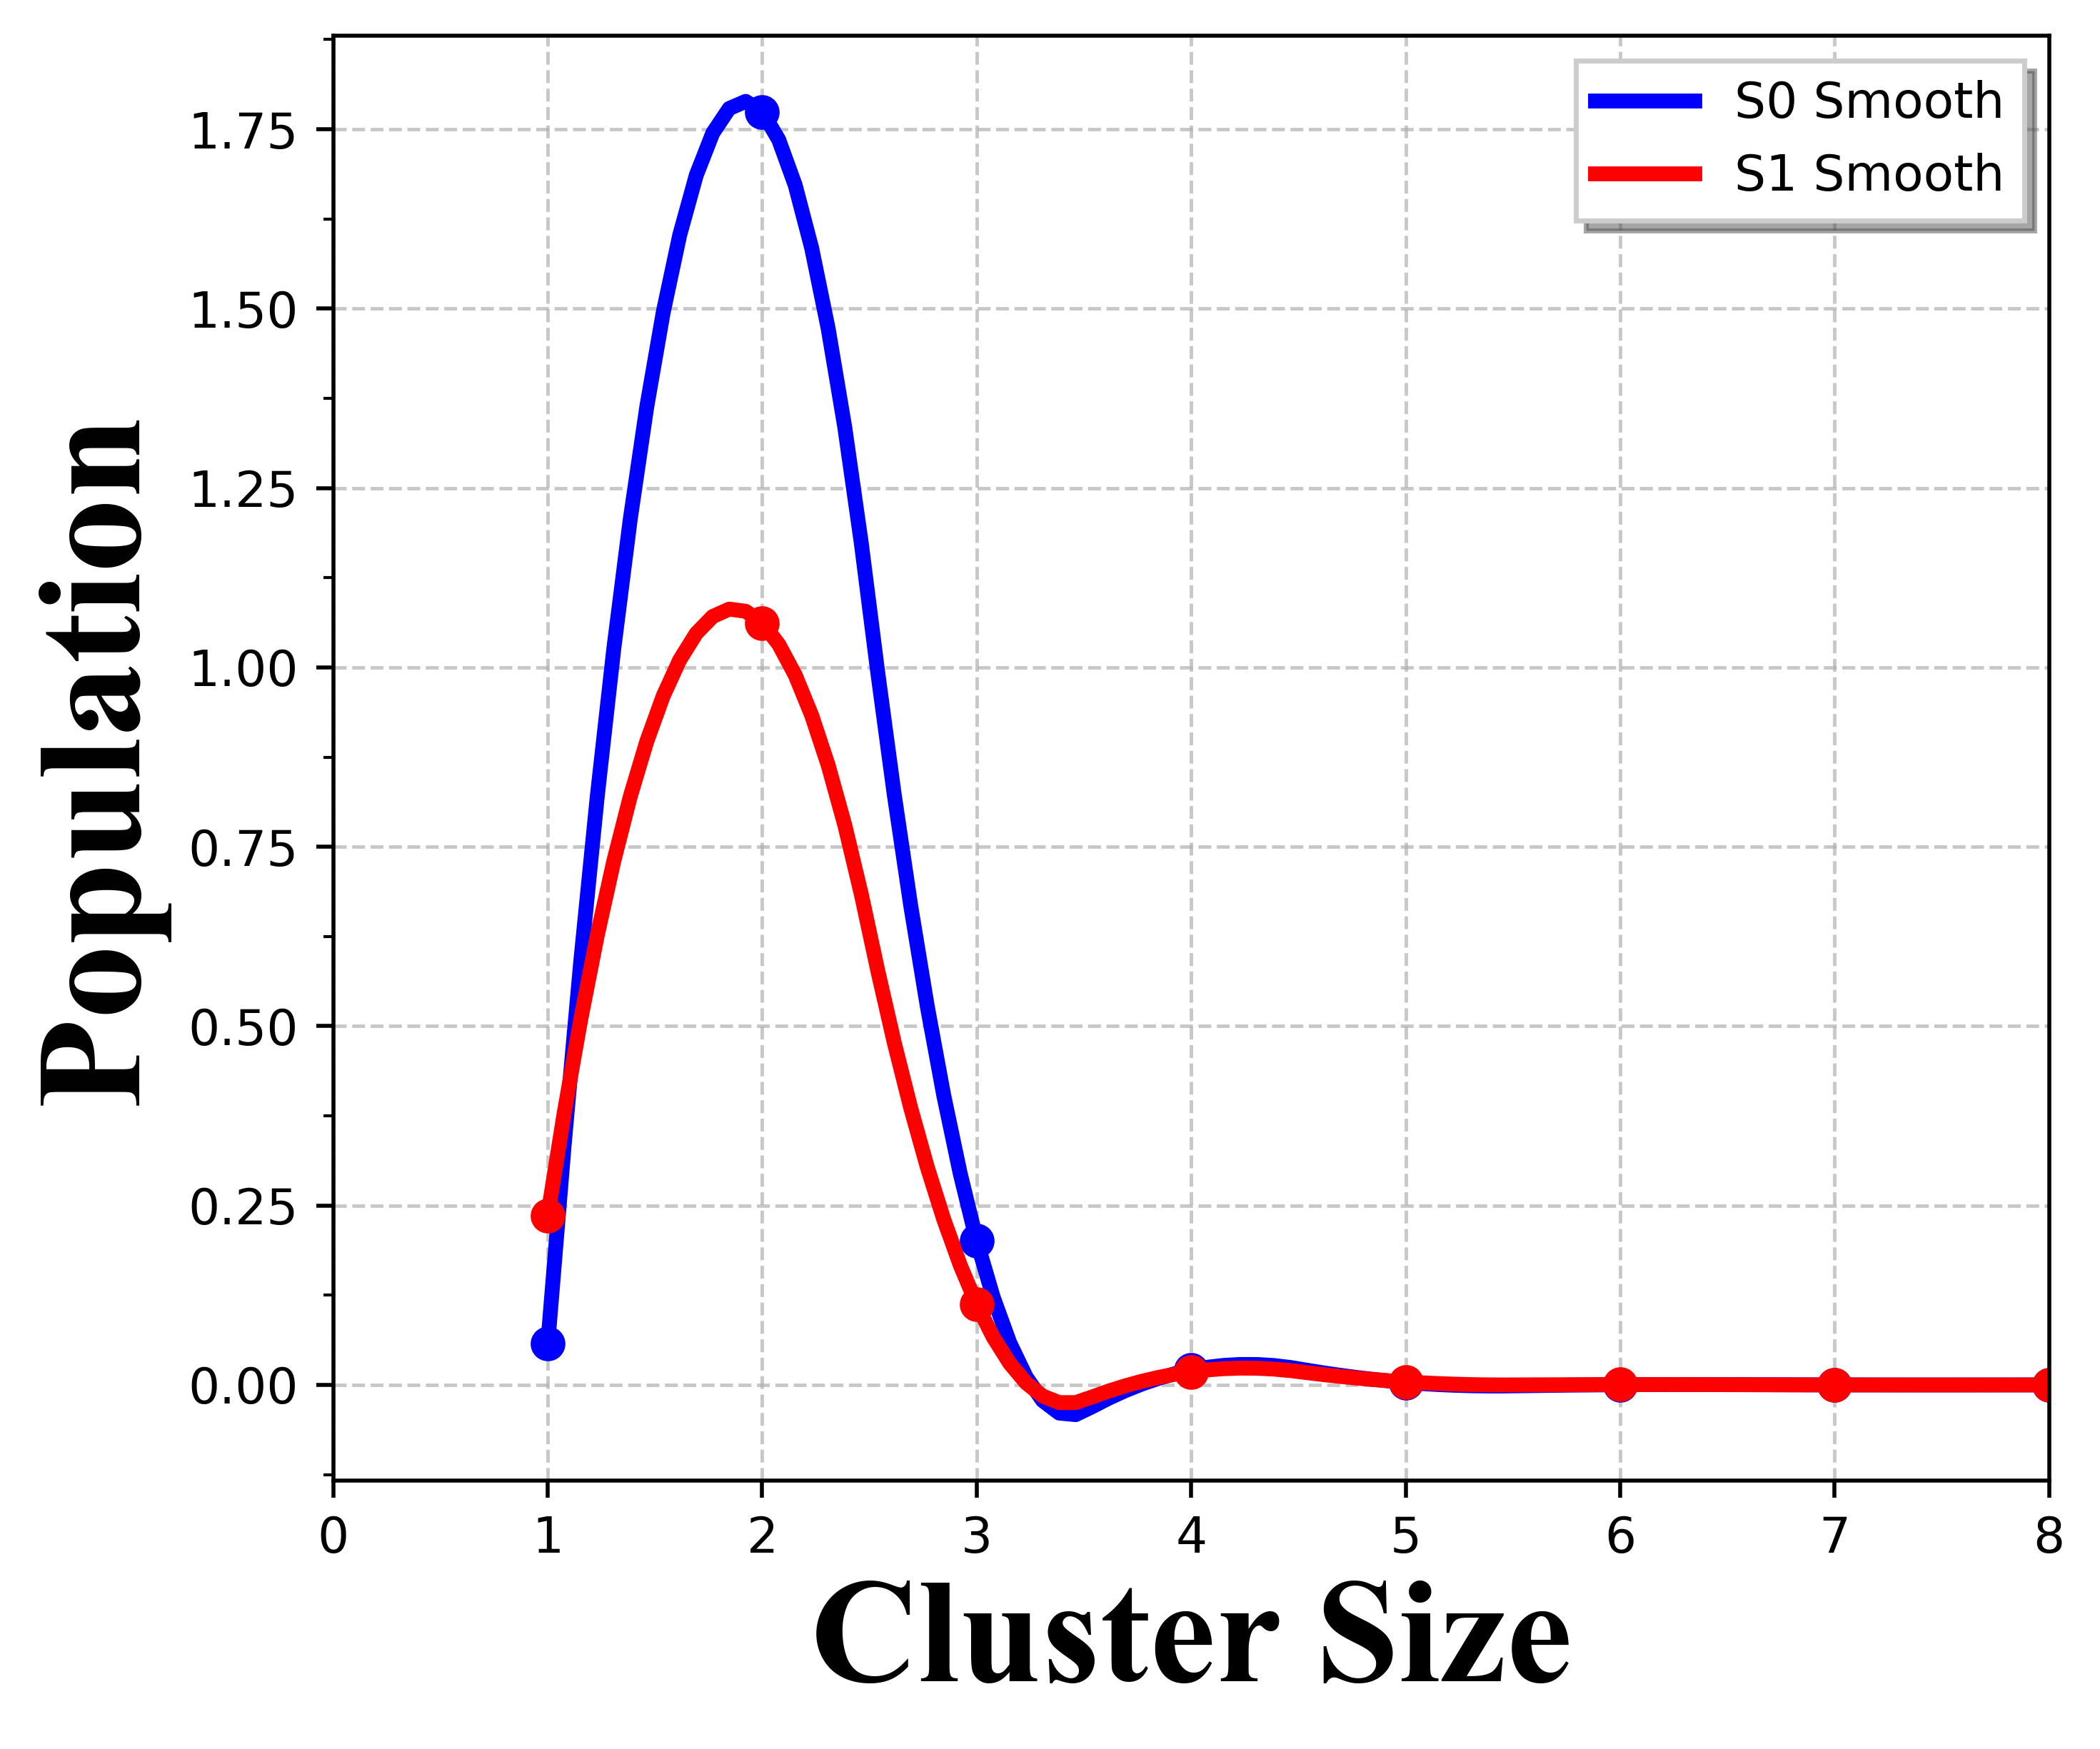

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from scipy.interpolate import make_interp_spline

# Define bins
bins = np.linspace(1, 24, endpoint=True, num=24)
bins_new = np.linspace(bins.min(), bins.max(), 300)

# Smoothing the data
spl = make_interp_spline(bins, average_clusters, k=2)  
spl1 = make_interp_spline(bins, average_clusters1, k=2)  
smooth_values = spl(bins_new)
smooth_values1 = spl1(bins_new)

# Define font for axis labels
font1 = {'family': 'Times New Roman', 'weight': 'bold', 'size': 30}

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 5), dpi=500)

# Scatter plot with smoothed lines
ax.plot(bins, average_clusters, 'o', color='blue', markersize=6)
ax.plot(bins_new, smooth_values, '-', color='blue', linewidth=3, label='S0 Smooth')

ax.plot(bins, average_clusters1, 'o', color='red', markersize=6)
ax.plot(bins_new, smooth_values1, '-', color='red', linewidth=3, label='S1 Smooth')

# Labels
ax.set_xlabel('Cluster Size', fontdict=font1)
ax.set_ylabel('Population', fontdict=font1)

# Grid and minor ticks
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
ax.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Legend
ax.legend(ncol=1, fontsize=18, frameon=True, fancybox=False, shadow=True, 
          loc='upper right', prop={'weight': 'normal'})

# Adjust layout and save
plt.tight_layout()
plt.xlim(0,8)
plt.savefig('cluster_population.png', dpi=500, bbox_inches="tight")

# Show plot
plt.show()


In [110]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rdf
from itertools import combinations
from functools import reduce
import pandas as pd

import warnings
warnings.simplefilter("ignore", category=np.VisibleDeprecationWarning)

# TPR = 'md_0_sim_resp_24trp-1sbt_500ns.tpr'
# XTC = 'md_0_sim_resp_24trp-1sbt_500ns_pbc_center.xtc'
TPR = 'md_0_sim_resp_24trp-1mnt_500ns.tpr'
XTC = 'md_0_sim_resp_24trp-1mnt_500ns_pbc_center.xtc'
# TPR = 'md_0_sim_resp_24trp-1ta_500ns.tpr'
# XTC = 'md_0_sim_resp_24trp-1ta_500ns_pbc_center.xtc'
# Load the trajectory and topology
u = mda.Universe(TPR, XTC)

# Select TRP and TA atoms
trp = u.select_atoms("resname TRP")
ta = u.select_atoms("resname MNT")

# Calculate the center of mass (COM) of TRP and TA molecules
trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
ta_coms = ta.center_of_mass(unwrap=True, compound="fragments")


final_clusters = []

for ts in u.trajectory[5000:]:

    clust_arr = np.zeros(24)
    # Calculate distances from TA to all TRPs and store them in dist1
    trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
    ta_coms = ta.center_of_mass(unwrap=True, compound="fragments")
    dist1 = []
    for i in trp_coms:
        dist1.append(np.linalg.norm(i-ta_coms[0])) #for ta_com in ta_coms)
    #print(dist1)
    
    # Identify TRPs outside cutoff
    cutoff_1 = 12.0
    outside_trps_idxs = np.where(np.array(dist1) >= cutoff_1)[0]
    print(len(outside_trps_idxs))
    
    # Identify cluster between only those TRPs outside TA
    outside_trps_pos = trp_coms[outside_trps_idxs]
    #print(outside_trps_pos)
    cutoff_2 = 7.5
    all_clust = []
    for i in range(0, len(outside_trps_idxs)-1):
        clust = [i]
        for j in range(i+1, len(outside_trps_idxs)):
            dist = np.linalg.norm(outside_trps_pos[i] - outside_trps_pos[j])
            if dist <= cutoff_2:
                clust.append(j)
        if (len(clust) > 1):
            all_clust.append(clust)
    # print(all_clust)
    
    if (len(all_clust) > 1):
        i = 0
        j = 0
        while i < len(all_clust) - 1:        
            intersect_clust = all_clust[i]
            while len(intersect_clust) != 0 and i < (len(all_clust) - 1):
                i += 1 
                intersect_clust = np.intersect1d(intersect_clust, all_clust[i]) 
            all_list = [m for m in all_clust[j:i]]  
            union_clust = reduce(np.union1d, all_list) 
            clust_arr[len(union_clust) - 1] += 1
            final_clusters.append(clust_arr)
            j = i
        
    else:
        size = len(all_clust)
        if size == 0:
            clust_arr[0] += 1
            final_clusters.append(clust_arr)
        else:
            id = len(all_clust[0]) - 1
            clust_arr[id] += 1
            final_clusters.append(clust_arr)

final_clusters = np.array(final_clusters)

23
23
23
23
24
24
24
24
24
23
23
23
23
23
23
23
23
23
23
23
24
23
24
24
23
24
23
23
23
23
23
23
23
23
23
24
23
24
24
24
24
24
24
24
24
24
24
24
24
23
22
23
24
24
24
23
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
22
22
22
23
23
23
23
23
22
24
23
23
23
23
23
23
23
24
23
24
22
24
24
23
24
24
24
23
23
23
23
23
23
23
23
23
23
23
23
24
23
24
24
24
24
24
23
24
24
24
24
24
24
24
24
24
23
23
23
24
24
23
23
22
23
23
23
23
23
23
23
22
23
22
22
21
22
21
22
24
22
22
24
20
21
22
22
23
23
23
23
22
22
21
21
21
21
22
22
21
22
23
23
23
22
22
22
24
23
23
23
22
21
22
23
23
22
22
22
22
22
23
21
22
23
23
24
22
22
23
24
24
24
23
24
24
24
24
24
23
24
24
23
23
23
24
24
23
23
23
23
24
24
24
24
23
23
23
23
23
23
23
23
24
24
24
24
24
24
24
24
21
23
24
24
23
24
24
23
23
22
22
21
24
24
24
24
23
23
23
23
24
24
24
24
24
24
24
24
23
24
24
23
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
23
24
23
24
24
23
23
22
23
24
23
24
24
24
23
24
23
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
2

In [111]:
df1 = pd.DataFrame(final_clusters)
average_clusters2 = df1.mean(axis=0)
print(average_clusters2)

0     0.054224
1     1.819254
2     0.176003
3     0.017049
4     0.001795
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
dtype: float64


In [99]:
df1 = pd.DataFrame(final_clusters)
average_clusters3 = df1.mean(axis=0)
print(average_clusters3)

0     0.135521
1     1.360770
2     0.239087
3     0.067618
4     0.026819
5     0.030243
6     0.006562
7     0.000428
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
dtype: float64


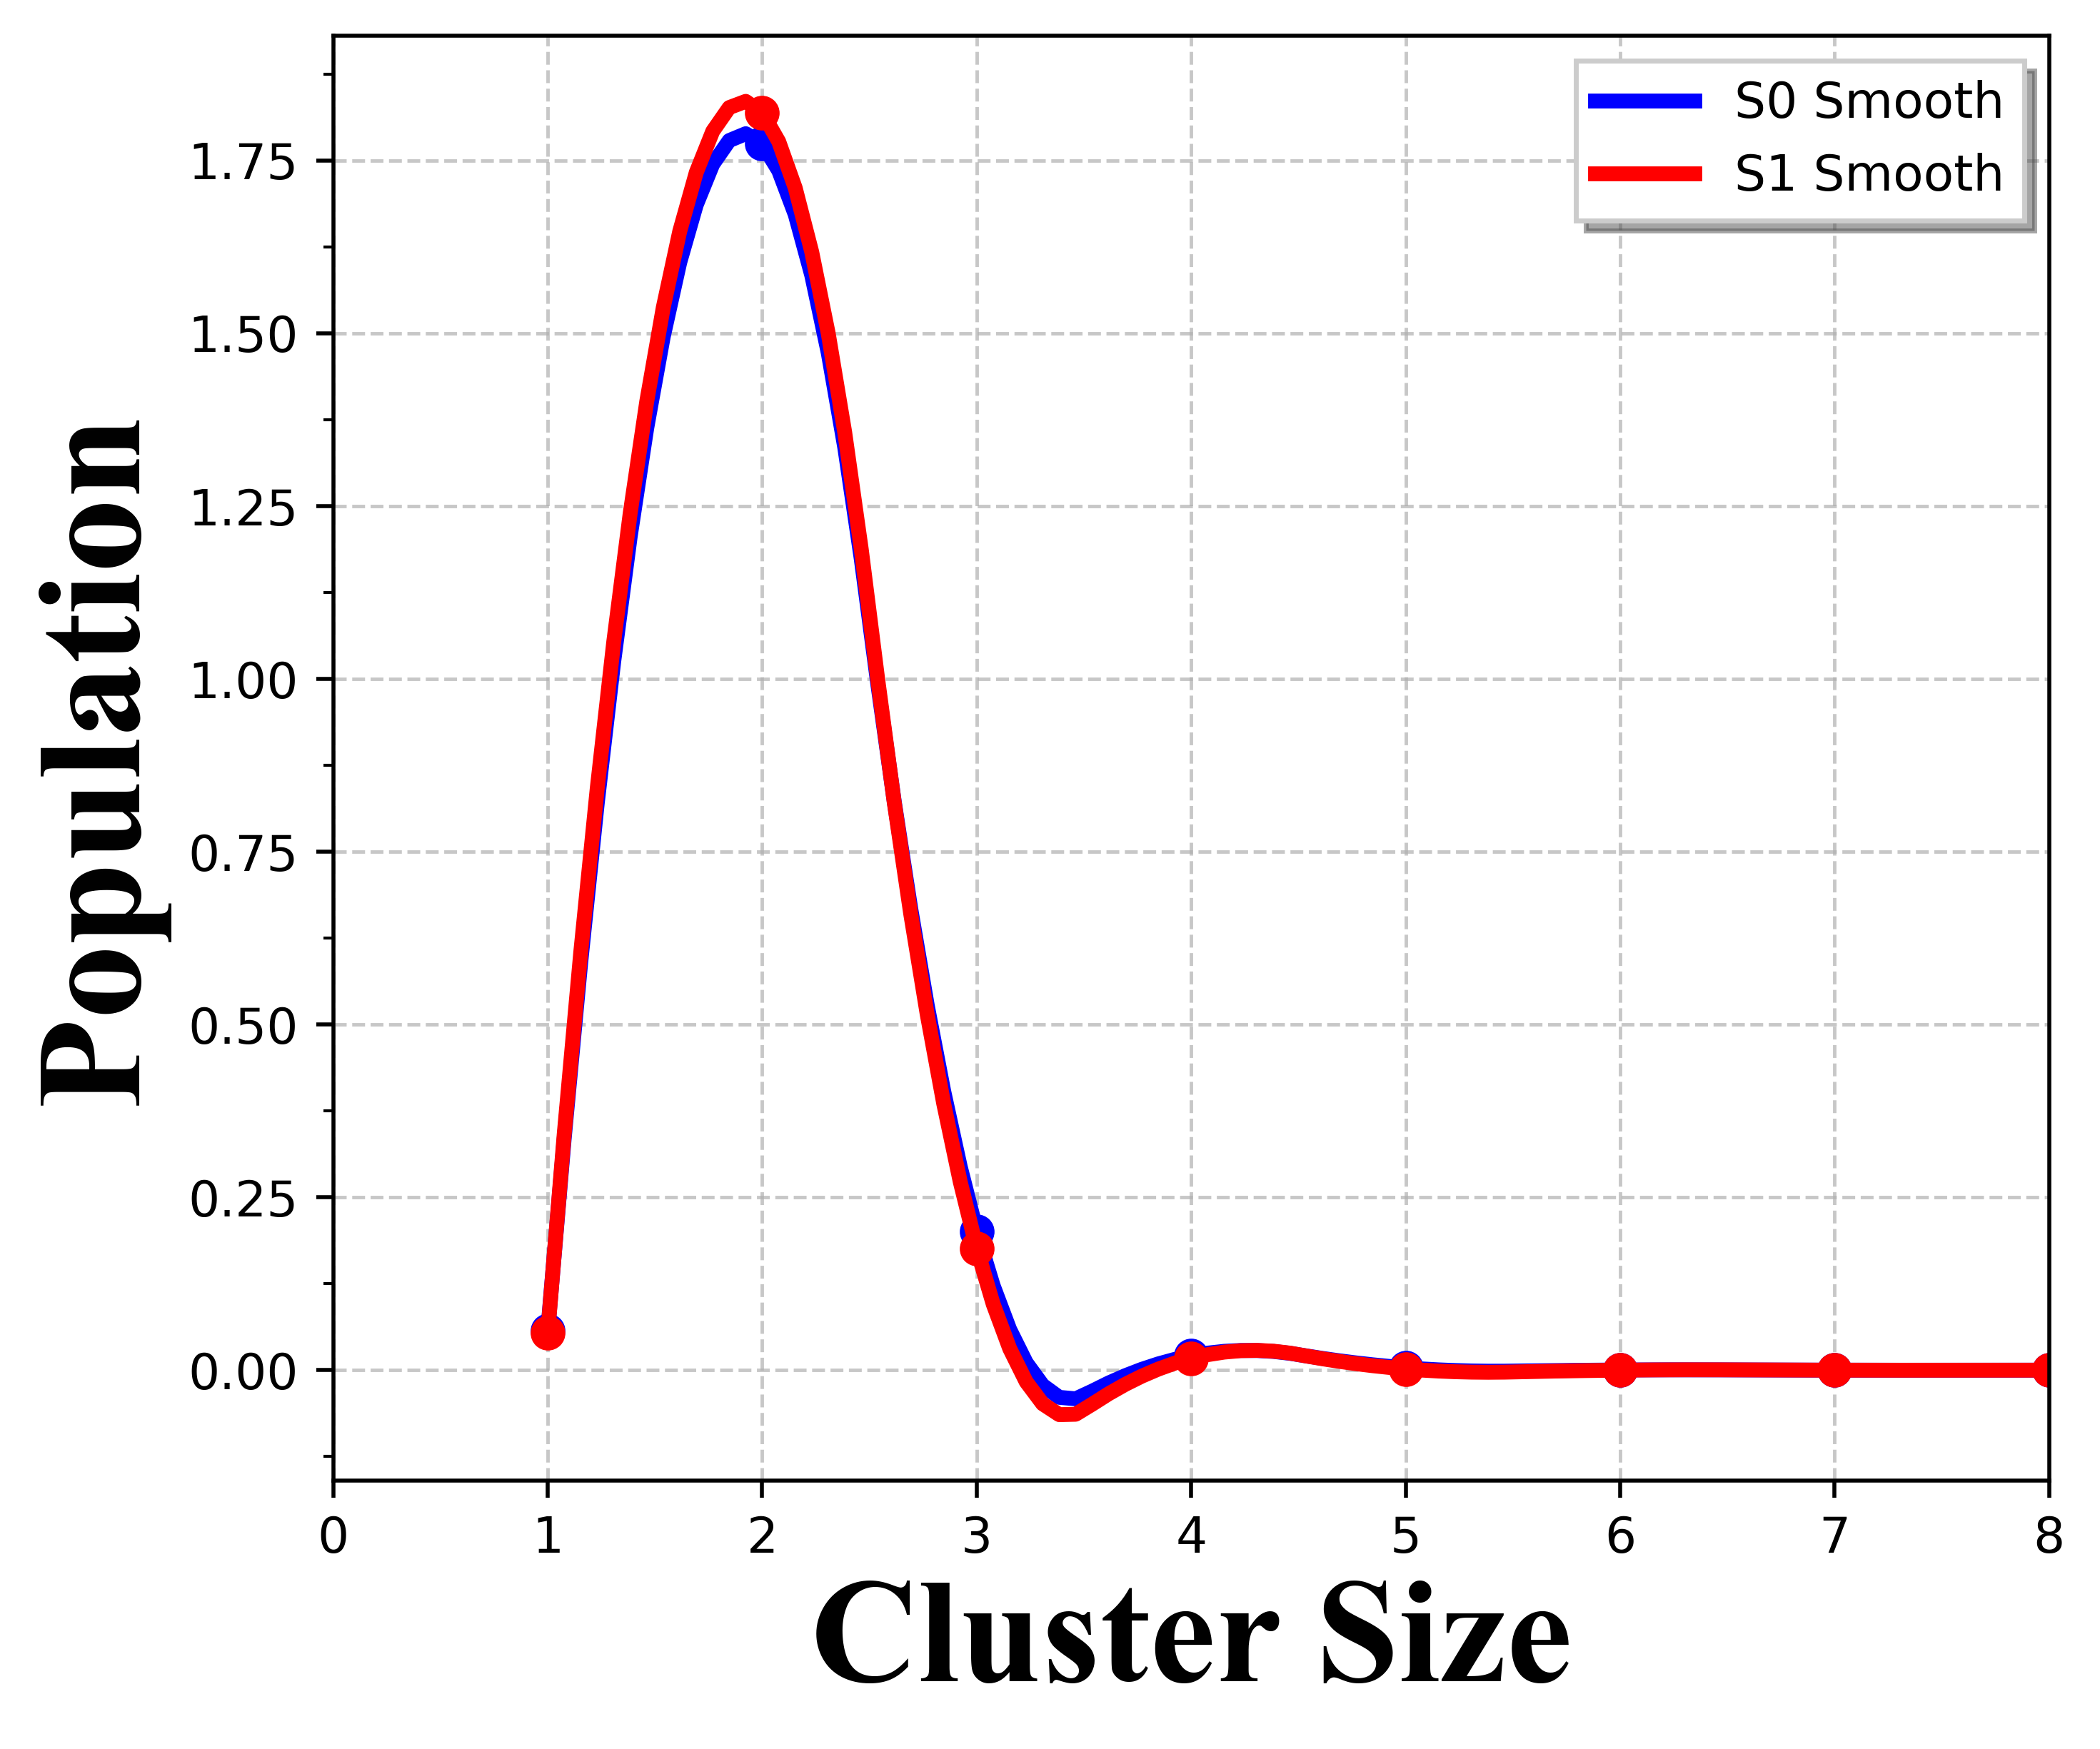

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from scipy.interpolate import make_interp_spline

# Define bins
bins = np.linspace(1, 24, endpoint=True, num=24)
bins_new = np.linspace(bins.min(), bins.max(), 300)

# Smoothing the data
spl = make_interp_spline(bins, average_clusters, k=2)  
spl1 = make_interp_spline(bins, average_clusters2, k=2)  
smooth_values = spl(bins_new)
smooth_values1 = spl1(bins_new)

# Define font for axis labels
font1 = {'family': 'Times New Roman', 'weight': 'bold', 'size': 30}

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 5), dpi=500)

# Scatter plot with smoothed lines
ax.plot(bins, average_clusters, 'o', color='blue', markersize=6)
ax.plot(bins_new, smooth_values, '-', color='blue', linewidth=3, label='S0 Smooth')

ax.plot(bins, average_clusters2, 'o', color='red', markersize=6)
ax.plot(bins_new, smooth_values1, '-', color='red', linewidth=3, label='S1 Smooth')

# Labels
ax.set_xlabel('Cluster Size', fontdict=font1)
ax.set_ylabel('Population', fontdict=font1)

# Grid and minor ticks
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
ax.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Legend
ax.legend(ncol=1, fontsize=18, frameon=True, fancybox=False, shadow=True, 
          loc='upper right', prop={'weight': 'normal'})

# Adjust layout and save
plt.tight_layout()
plt.xlim(0,8)
# plt.savefig('cluster_population1.png', dpi=500, bbox_inches="tight")

# Show plot
plt.show()


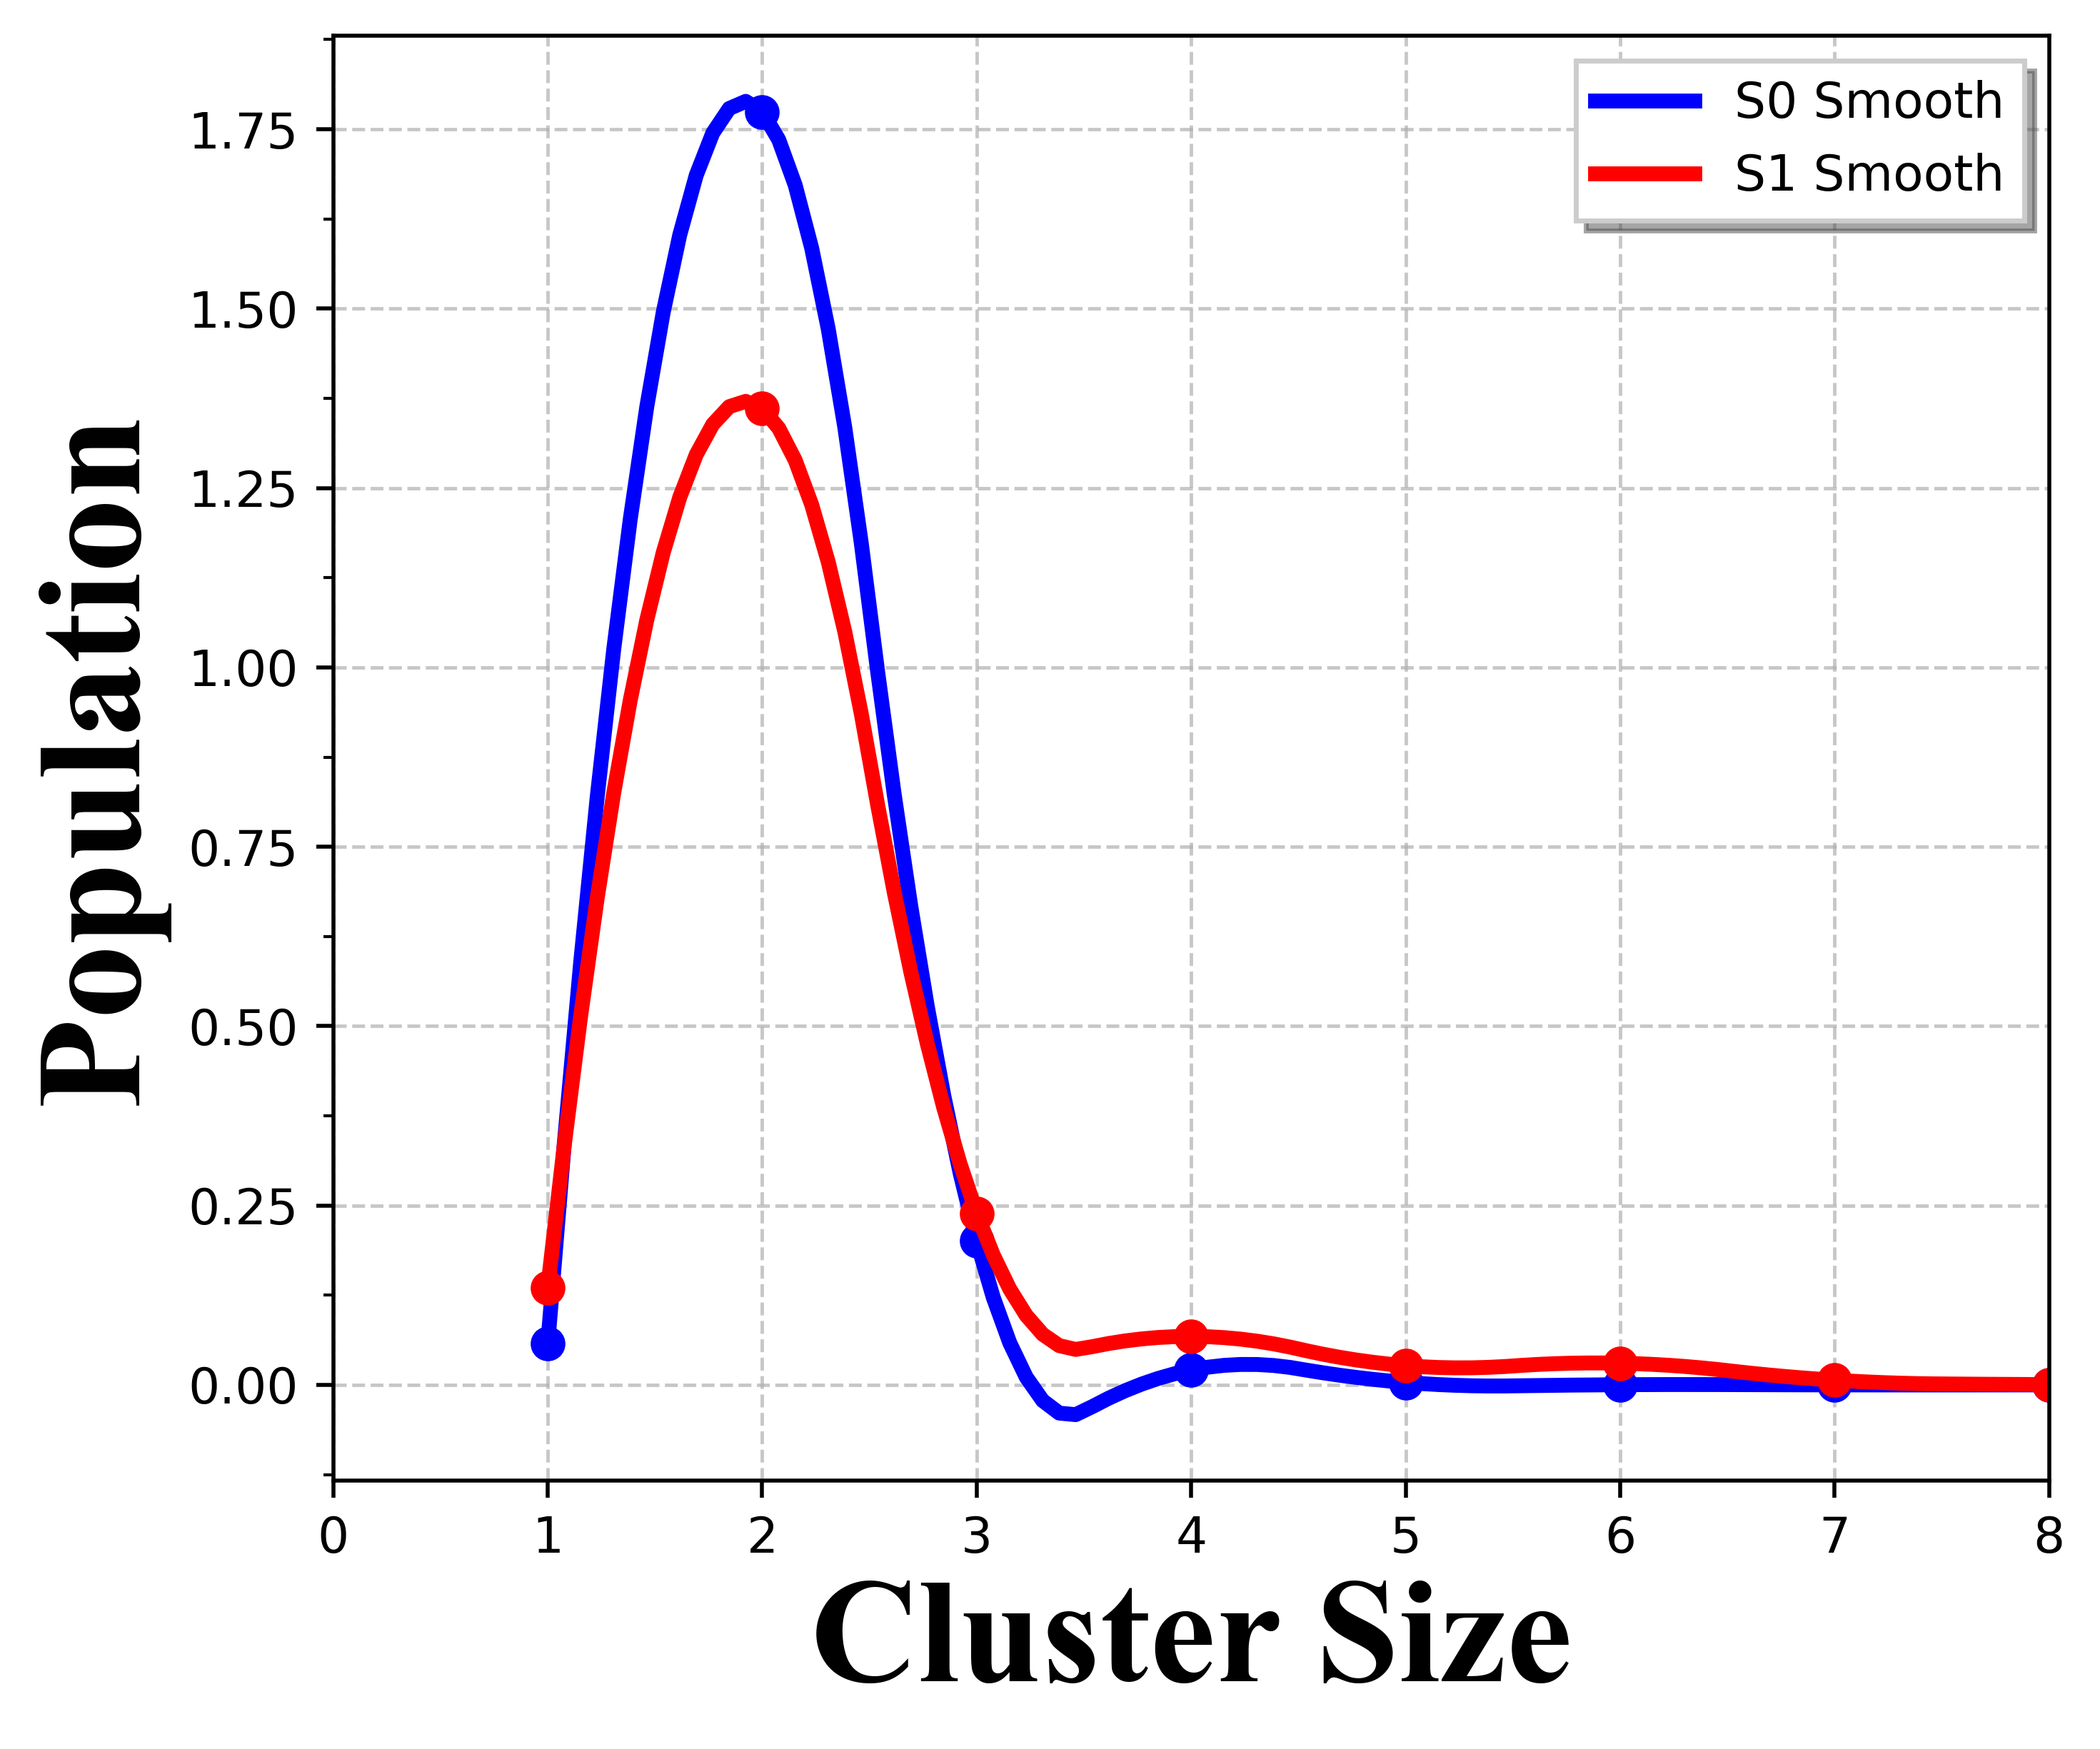

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from scipy.interpolate import make_interp_spline

# Define bins
bins = np.linspace(1, 24, endpoint=True, num=24)
bins_new = np.linspace(bins.min(), bins.max(), 300)

# Smoothing the data
spl = make_interp_spline(bins, average_clusters, k=2)  
spl1 = make_interp_spline(bins, average_clusters3, k=2)  
smooth_values = spl(bins_new)
smooth_values1 = spl1(bins_new)

# Define font for axis labels
font1 = {'family': 'Times New Roman', 'weight': 'bold', 'size': 30}

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 5), dpi=500)

# Scatter plot with smoothed lines
ax.plot(bins, average_clusters, 'o', color='blue', markersize=6)
ax.plot(bins_new, smooth_values, '-', color='blue', linewidth=3, label='S0 Smooth')

ax.plot(bins, average_clusters3, 'o', color='red', markersize=6)
ax.plot(bins_new, smooth_values1, '-', color='red', linewidth=3, label='S1 Smooth')

# Labels
ax.set_xlabel('Cluster Size', fontdict=font1)
ax.set_ylabel('Population', fontdict=font1)

# Grid and minor ticks
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
ax.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Legend
ax.legend(ncol=1, fontsize=18, frameon=True, fancybox=False, shadow=True, 
          loc='upper right', prop={'weight': 'normal'})

# Adjust layout and save
plt.tight_layout()
plt.xlim(0,8)
# plt.savefig('cluster_population1.png', dpi=500, bbox_inches="tight")

# Show plot
plt.show()


In [89]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rdf
from itertools import combinations
from functools import reduce
import pandas as pd

import warnings
warnings.simplefilter("ignore", category=np.VisibleDeprecationWarning)

# Load trajectory
TPR = 'md_0_sim_resp_24trp-2mnt_500ns.tpr'
XTC = 'md_0_sim_resp_24trp-2mnt_500ns_pbc_center.xtc'
u = mda.Universe(TPR, XTC)

# Select TRP and TA atoms
trp = u.select_atoms("resname TRP")
ta = u.select_atoms("resname MNT")

# Check if we have exactly 2 TA molecules
if len(ta.fragments) != 2:
    raise ValueError(f"Expected 2 TA molecules, but found {len(ta.fragments)}.")

final_clusters = []

for ts in u.trajectory[5000:]:

    clust_arr = np.zeros(24)
    
    # Compute TRP and TA centers of mass
    trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
    ta_coms = ta.center_of_mass(unwrap=True, compound="fragments")  # Should return 2 centers
    
    dist1 = []  # Store minimum distance of each TRP from any TA
    for trp_pos in trp_coms:
        distances = [np.linalg.norm(trp_pos - ta_pos) for ta_pos in ta_coms]
        min_dist = min(distances)  # Take the closest TA
        dist1.append(min_dist)
    
    # Identify TRPs outside cutoff_1 for both TA molecules
    cutoff_1 = 12.0
    outside_trps_idxs = np.where(np.array(dist1) >= cutoff_1)[0]
    
    # Identify clustering among the outside TRPs
    outside_trps_pos = trp_coms[outside_trps_idxs]
    cutoff_2 = 7.5
    all_clust = []
    for i in range(0, len(outside_trps_idxs)-1):
        clust = [i]
        for j in range(i+1, len(outside_trps_idxs)):
            dist = np.linalg.norm(outside_trps_pos[i] - outside_trps_pos[j])
            if dist <= cutoff_2:
                clust.append(j)
        if len(clust) > 1:
            all_clust.append(clust)
    
    # Merging clusters
    if len(all_clust) > 1:
        i = 0
        j = 0
        while i < len(all_clust) - 1:        
            intersect_clust = all_clust[i]
            while len(intersect_clust) != 0 and i < (len(all_clust) - 1):
                i += 1 
                intersect_clust = np.intersect1d(intersect_clust, all_clust[i]) 
            all_list = [m for m in all_clust[j:i]]  
            union_clust = reduce(np.union1d, all_list) 
            clust_arr[len(union_clust) - 1] += 1
            final_clusters.append(clust_arr)
            j = i
    else:
        size = len(all_clust)
        if size == 0:
            clust_arr[0] += 1
            final_clusters.append(clust_arr)
        else:
            id = len(all_clust[0]) - 1
            clust_arr[id] += 1
            final_clusters.append(clust_arr)

final_clusters = np.array(final_clusters)


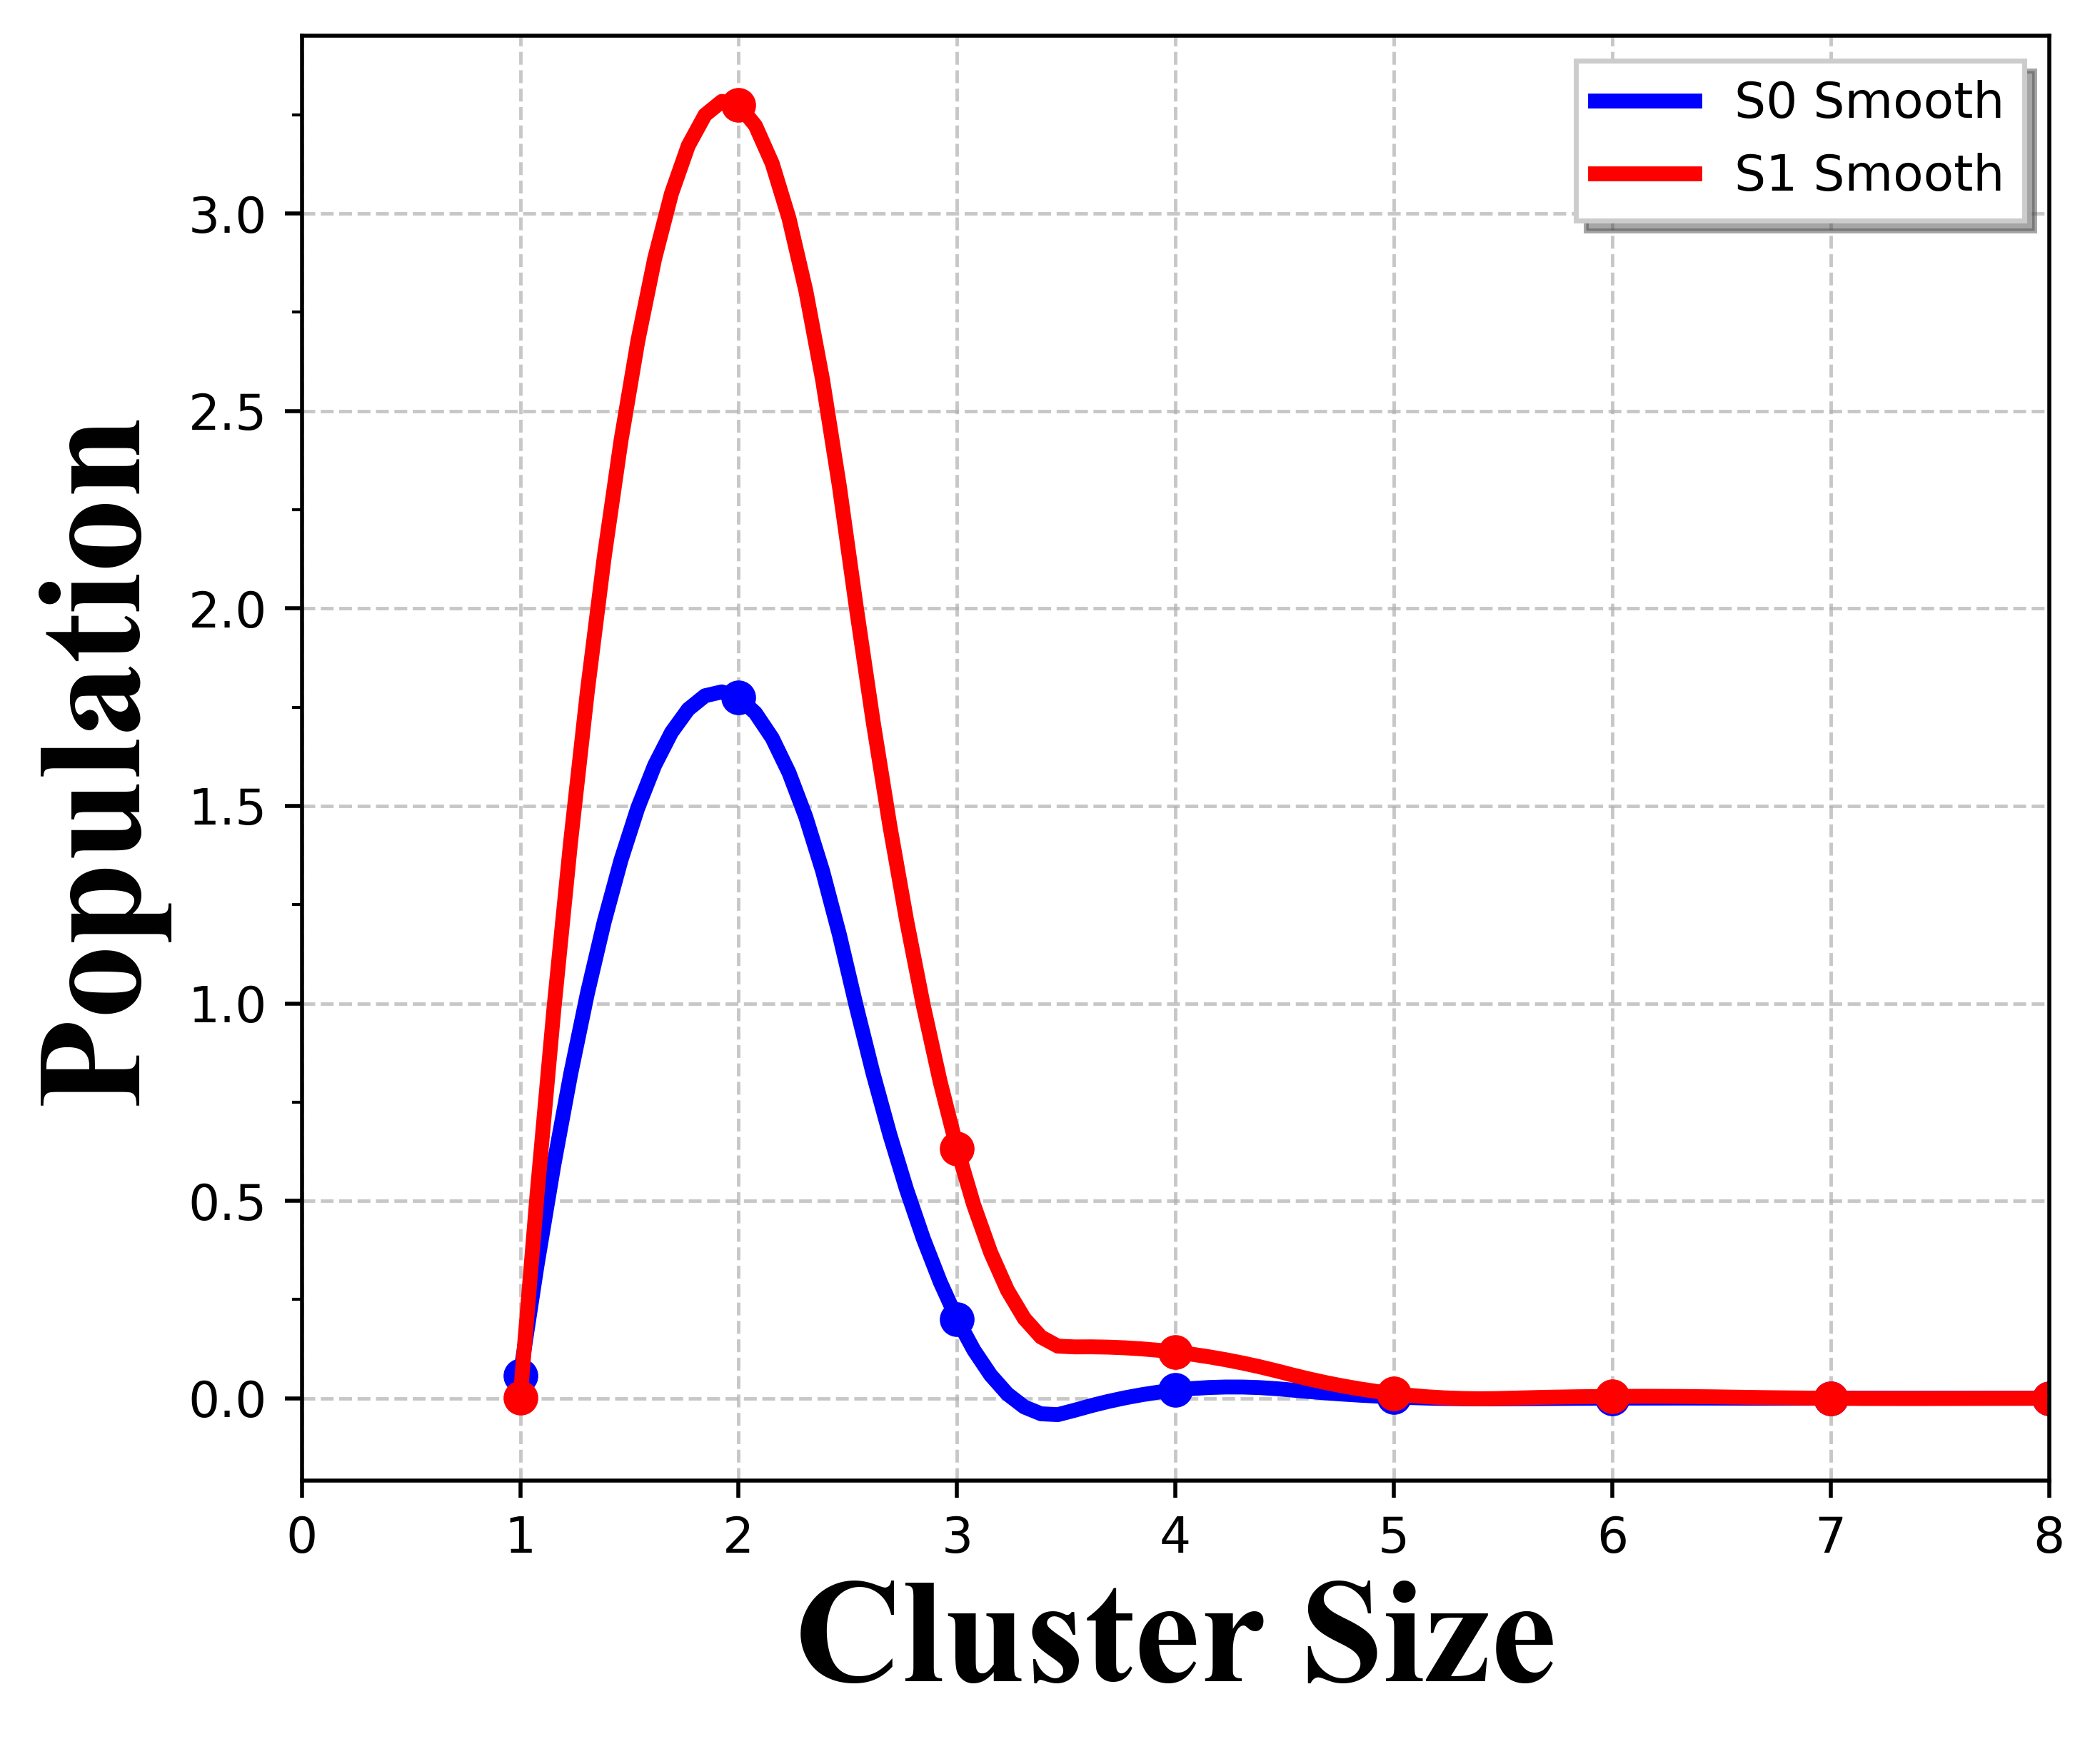

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from scipy.interpolate import make_interp_spline

# Define bins
bins = np.linspace(1, 24, endpoint=True, num=24)
bins_new = np.linspace(bins.min(), bins.max(), 300)

# Smoothing the data
spl = make_interp_spline(bins, average_clusters, k=2)  
spl1 = make_interp_spline(bins, average_clusters4, k=2)  
smooth_values = spl(bins_new)
smooth_values1 = spl1(bins_new)

# Define font for axis labels
font1 = {'family': 'Times New Roman', 'weight': 'bold', 'size': 30}

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 5), dpi=500)

# Scatter plot with smoothed lines
ax.plot(bins, average_clusters, 'o', color='blue', markersize=6)
ax.plot(bins_new, smooth_values, '-', color='blue', linewidth=3, label='S0 Smooth')

ax.plot(bins, average_clusters4, 'o', color='red', markersize=6)
ax.plot(bins_new, smooth_values1, '-', color='red', linewidth=3, label='S1 Smooth')

# Labels
ax.set_xlabel('Cluster Size', fontdict=font1)
ax.set_ylabel('Population', fontdict=font1)

# Grid and minor ticks
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
ax.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Legend
ax.legend(ncol=1, fontsize=18, frameon=True, fancybox=False, shadow=True, 
          loc='upper right', prop={'weight': 'normal'})

# Adjust layout and save
plt.tight_layout()
plt.xlim(0,8)
# plt.savefig('cluster_population1.png', dpi=500, bbox_inches="tight")

# Show plot
plt.show()


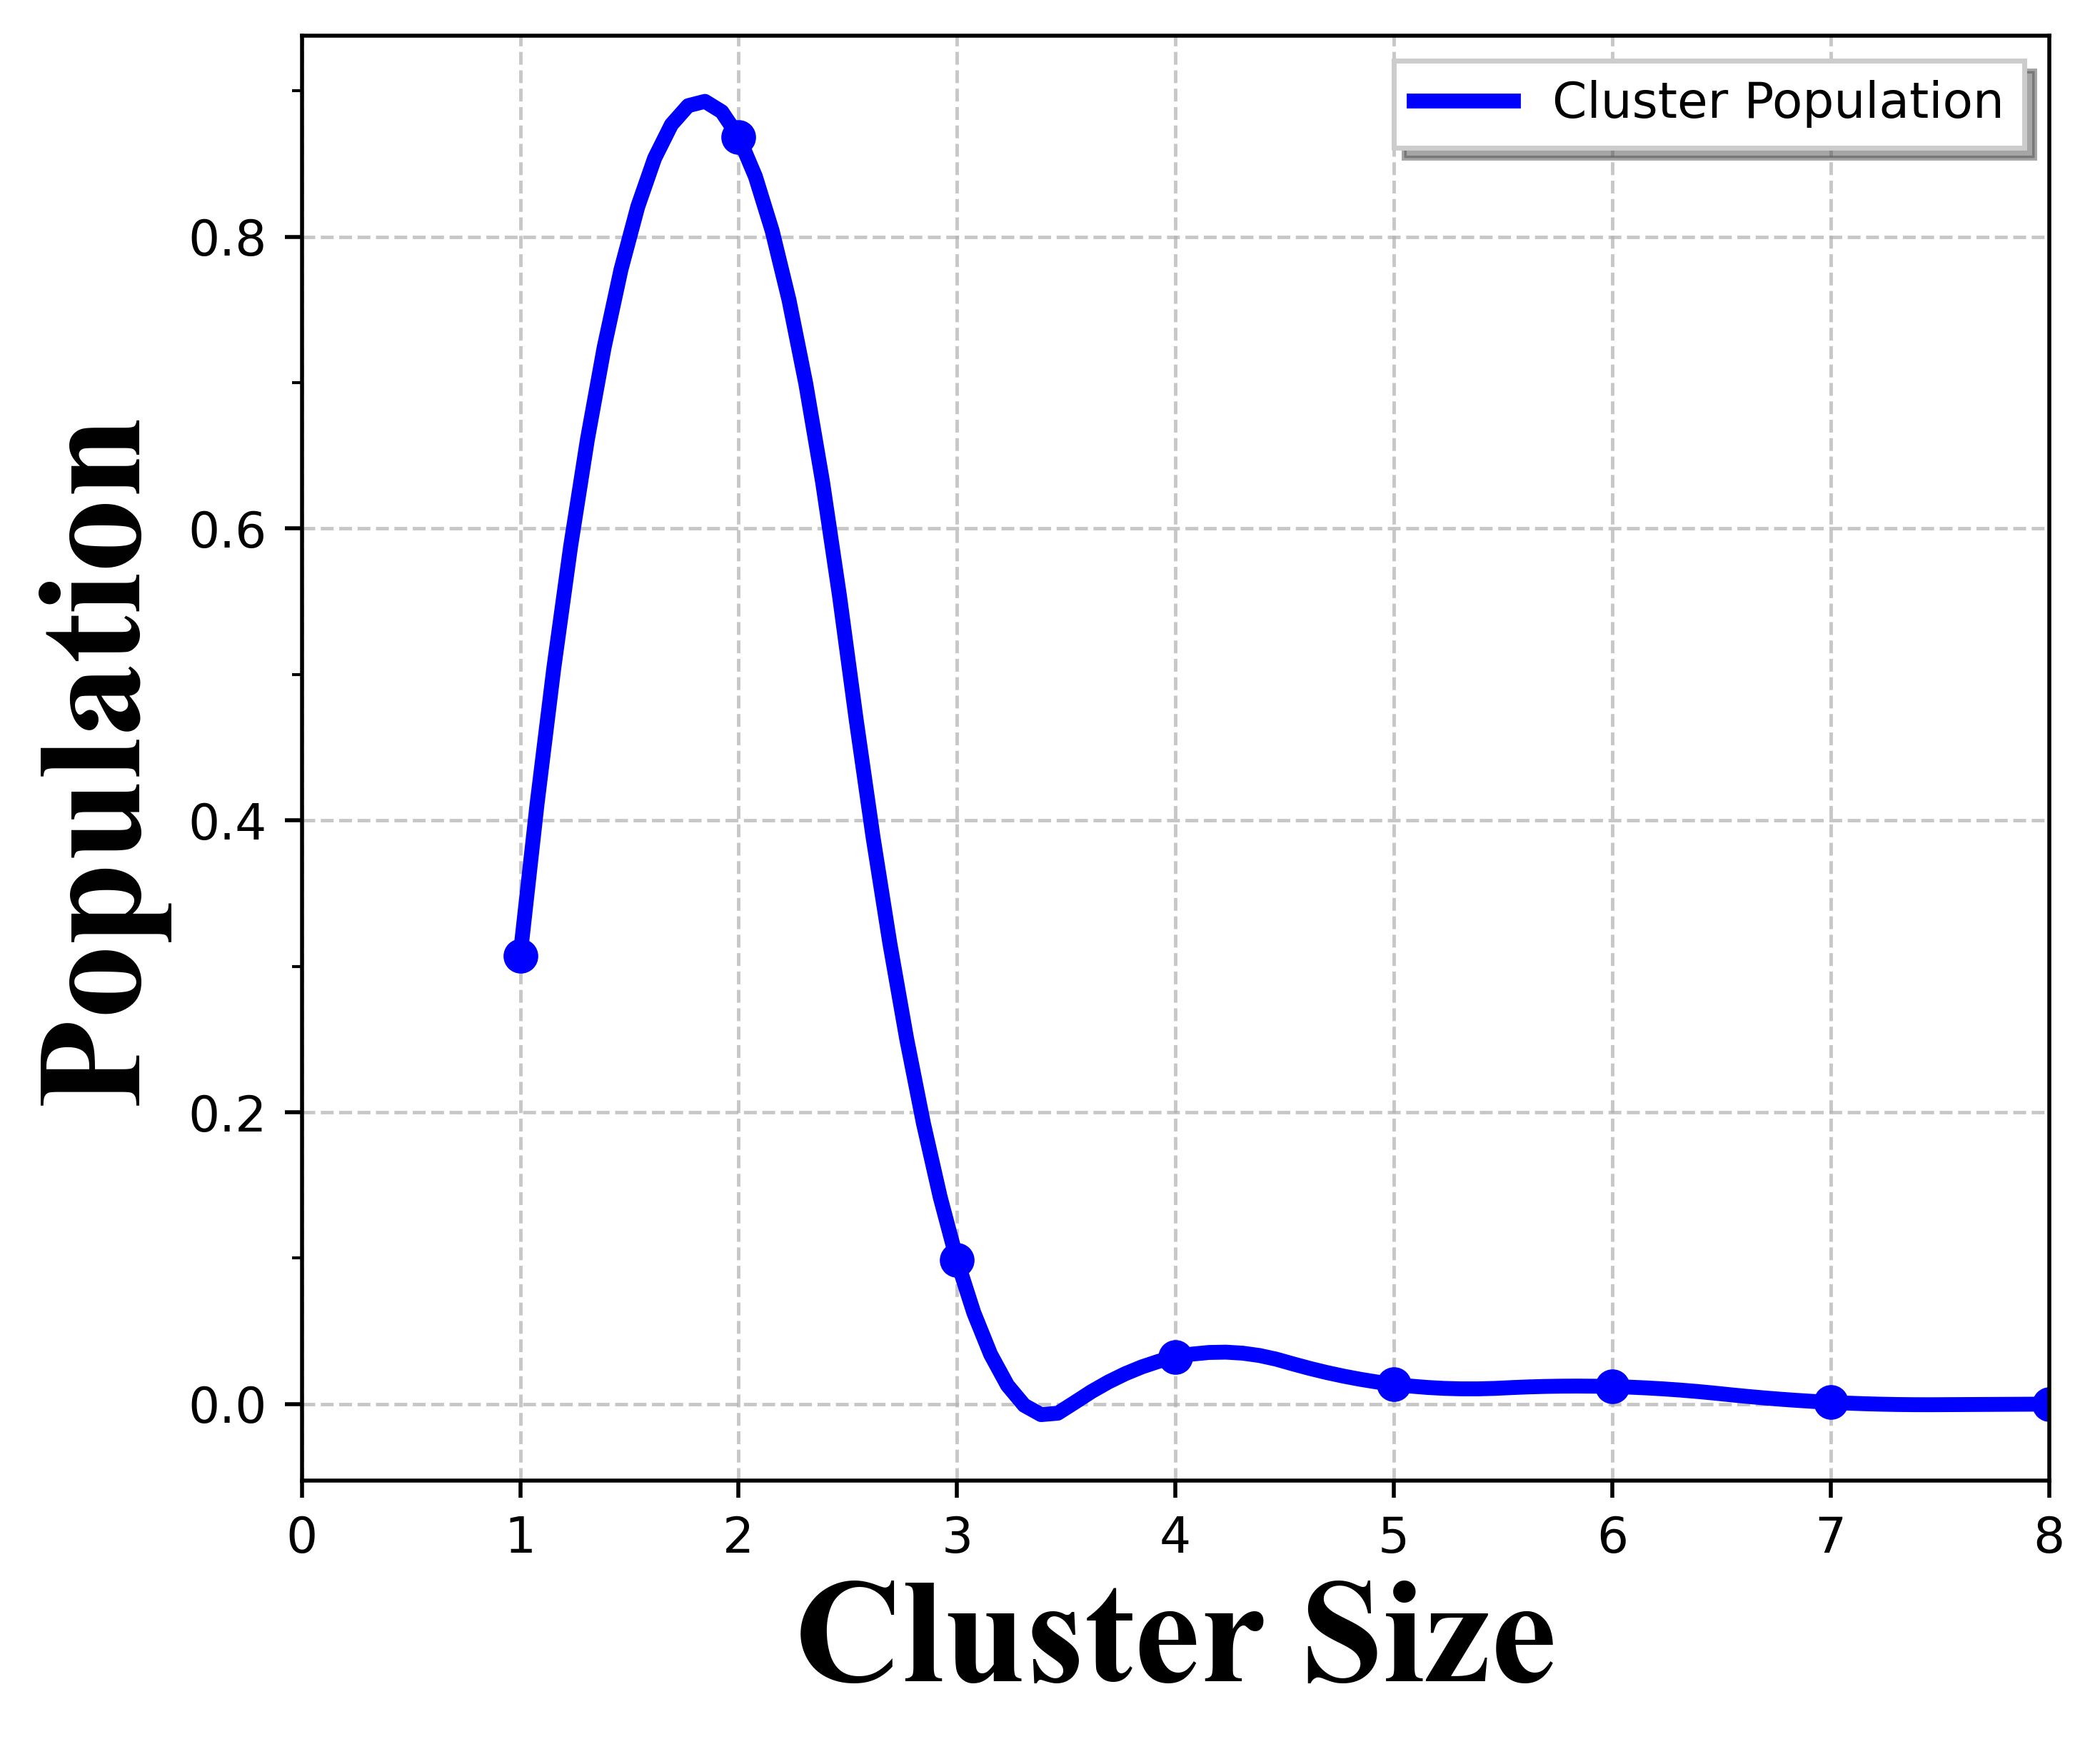

In [ ]:
# Convert to DataFrame for analysis
final_clusters = np.array(final_clusters)
df1 = pd.DataFrame(final_clusters)
average_clusters4 = df1.mean(axis=0)

# print("Final Cluster Averages:\n", average_clusters)

# Plotting
import matplotlib.ticker
from scipy.interpolate import make_interp_spline

# Define bins
# bins = np.linspace(1, num_trp, num=num_trp)
bins_new = np.linspace(bins.min(), bins.max(), 300)

# Smooth data
spl = make_interp_spline(bins, average_clusters4, k=2)
smooth_values = spl(bins_new)

# Define font for axis labels
font1 = {'family': 'Times New Roman', 'weight': 'bold', 'size': 30}

# Create figure
fig, ax = plt.subplots(figsize=(6, 5), dpi=500)

# Scatter plot with smoothed lines
ax.plot(bins, average_clusters4, 'o', color='blue', markersize=6)
ax.plot(bins_new, smooth_values, '-', color='blue', linewidth=3, label='Cluster Population')

# Labels
ax.set_xlabel('Cluster Size', fontdict=font1)
ax.set_ylabel('Population', fontdict=font1)

# Grid
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
ax.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Legend
ax.legend(ncol=1, fontsize=18, frameon=True, fancybox=False, shadow=True, 
          loc='upper right', prop={'weight': 'normal'})

# Adjust layout
plt.tight_layout()
plt.xlim(0, 8)

# Show plot
plt.show()


In [57]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rdf
from itertools import combinations
from functools import reduce
import pandas as pd

import warnings
warnings.simplefilter("ignore", category=np.VisibleDeprecationWarning)

# TPR = 'md_0_sim_resp_24trp-1sbt_500ns.tpr'
# XTC = 'md_0_sim_resp_24trp-1sbt_500ns_pbc_center.xtc'
# TPR = 'md_0_sim_resp_24trp-6mnt_500ns.tpr'
# XTC = 'md_0_sim_resp_24trp-6mnt_500ns_pbc_center.xtc'
TPR = 'md_0_sim_resp_24trp-3ta_500ns.tpr'
XTC = 'md_0_sim_resp_24trp-3ta_500ns_pbc_center.xtc'
# Load the trajectory and topology
u = mda.Universe(TPR, XTC)

# Select TRP and TA atoms
trp = u.select_atoms("resname TRP")
ta = u.select_atoms("resname TA5")

# Calculate the center of mass (COM) of TRP and TA molecules
trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
ta_coms = ta.center_of_mass(unwrap=True, compound="fragments")
print(len(trp_coms))
print(len(ta_coms))

final_clusters = []

for ts in u.trajectory[5000:]:

    clust_arr = np.zeros(24)
    # Calculate distances from TA to all TRPs and store them in dist1
    trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
    ta_coms = ta.center_of_mass(unwrap=True, compound="fragments")
    dist1 = []
    # for i in trp_coms:
    #     dist1.append(np.linalg.norm(i-ta_coms[0]))
    # #print(dist1)
    cutoff_1 = 12.0
    inside_trps_idxs = []
    for i in ta_coms:
        dist1 = [np.linalg.norm(j - i) for j in trp_coms]
        inside_trps_idxs.append(np.where(np.array(dist1) <= cutoff_1)[0])
    inside_trps_idxs = np.unique(np.concatenate(inside_trps_idxs))
    outside_trp_idxs = np.delete(np.unique(np.where(trp_coms)[0]), inside_trps_idxs)
    print(len(outside_trp_idxs))
    # # Identify TRPs outside cutoff
    # cutoff_1 = 12.0
    # outside_trps_idxs = np.where(np.array(dist1) >= cutoff_1)[0]
    # print(len(outside_trps_idxs))
    
    # Identify cluster between only those TRPs outside TA
    outside_trps_pos = trp_coms[outside_trps_idxs]
    #print(outside_trps_pos)
    cutoff_2 = 7.5
    all_clust = []
    for i in range(0, len(outside_trps_idxs)-1):
        clust = [i]
        for j in range(i+1, len(outside_trps_idxs)):
            dist = np.linalg.norm(outside_trps_pos[i] - outside_trps_pos[j])
            if dist <= cutoff_2:
                clust.append(j)
        if (len(clust) > 1):
            all_clust.append(clust)
    # print(all_clust)
    
    if (len(all_clust) > 1):
        i = 0
        j = 0
        while i < len(all_clust) - 1:        
            intersect_clust = all_clust[i]
            while len(intersect_clust) != 0 and i < (len(all_clust) - 1):
                i += 1 
                intersect_clust = np.intersect1d(intersect_clust, all_clust[i]) 
            all_list = [m for m in all_clust[j:i]]  
            union_clust = reduce(np.union1d, all_list) 
            clust_arr[len(union_clust) - 1] += 1
            final_clusters.append(clust_arr)
            j = i
        
    else:
        size = len(all_clust)
        if size == 0:
            clust_arr[0] += 1
            final_clusters.append(clust_arr)
        else:
            id = len(all_clust[0]) - 1
            clust_arr[id] += 1
            final_clusters.append(clust_arr)

final_clusters = np.array(final_clusters)

24
3
11
12
13
12
13
11
13
11
11
9
10
11
12
12
11
11
12
10
11
10
10
10
9
11
11
12
13
14
12
13
13
14
16
16
15
14
13
13
13
14
12
13
14
14
13
13
12
12
12
14
13
14
15
14
14
16
13
11
13
11
13
10
12
11
12
10
12
14
16
15
16
12
11
10
10
9
10
13
13
14
12
12
10
10
9
9
9
9
9
9
9
8
8
9
8
8
7
6
8
11
11
10
10
10
9
10
12
10
12
13
11
14
14
18
17
17
10
12
16
16
15
15
14
12
13
14
15
14
12
11
12
12
12
14
14
13
12
13
11
13
12
13
13
12
14
12
13
12
14
16
18
14
18
8
12
16
11
11
10
8
8
8
8
8
7
7
9
8
9
8
6
7
7
7
7
6
8
9
6
8
9
9
8
10
10
6
7
7
8
8
8
7
6
5
6
6
6
6
6
6
8
7
5
7
7
5
7
7
5
6
6
5
8
7
5
6
5
6
6
6
7
9
8
8
8
5
6
5
5
7
9
8
11
10
8
9
11
7
8
10
12
6
5
5
6
5
6
6
11
7
5
6
6
7
7
8
8
7
7
7
9
11
7
12
12
10
12
9
8
8
9
10
6
6
7
7
8
13
11
13
13
13
15
12
14
11
11
11
12
12
11
12
11
11
10
10
12
13
14
12
12
13
12
13
11
12
12
14
13
12
11
11
11
13
12
12
14
11
11
11
14
12
11
13
14
13
14
12
11
11
11
11
12
12
11
10
11
11
10
12
10
11
10
11
13
14
9
9
9
11
11
10
12
14
14
13
12
13
11
13
14
17
9
9
13
12
13
8
9
12
9
8
9
11
10
10
9

In [58]:
df1 = pd.DataFrame(final_clusters)
average_clusters4 = df1.mean(axis=0)
print(average_clusters4)

0     0.001155
1     3.275235
2     0.632999
3     0.116925
4     0.011668
5     0.004740
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
dtype: float64


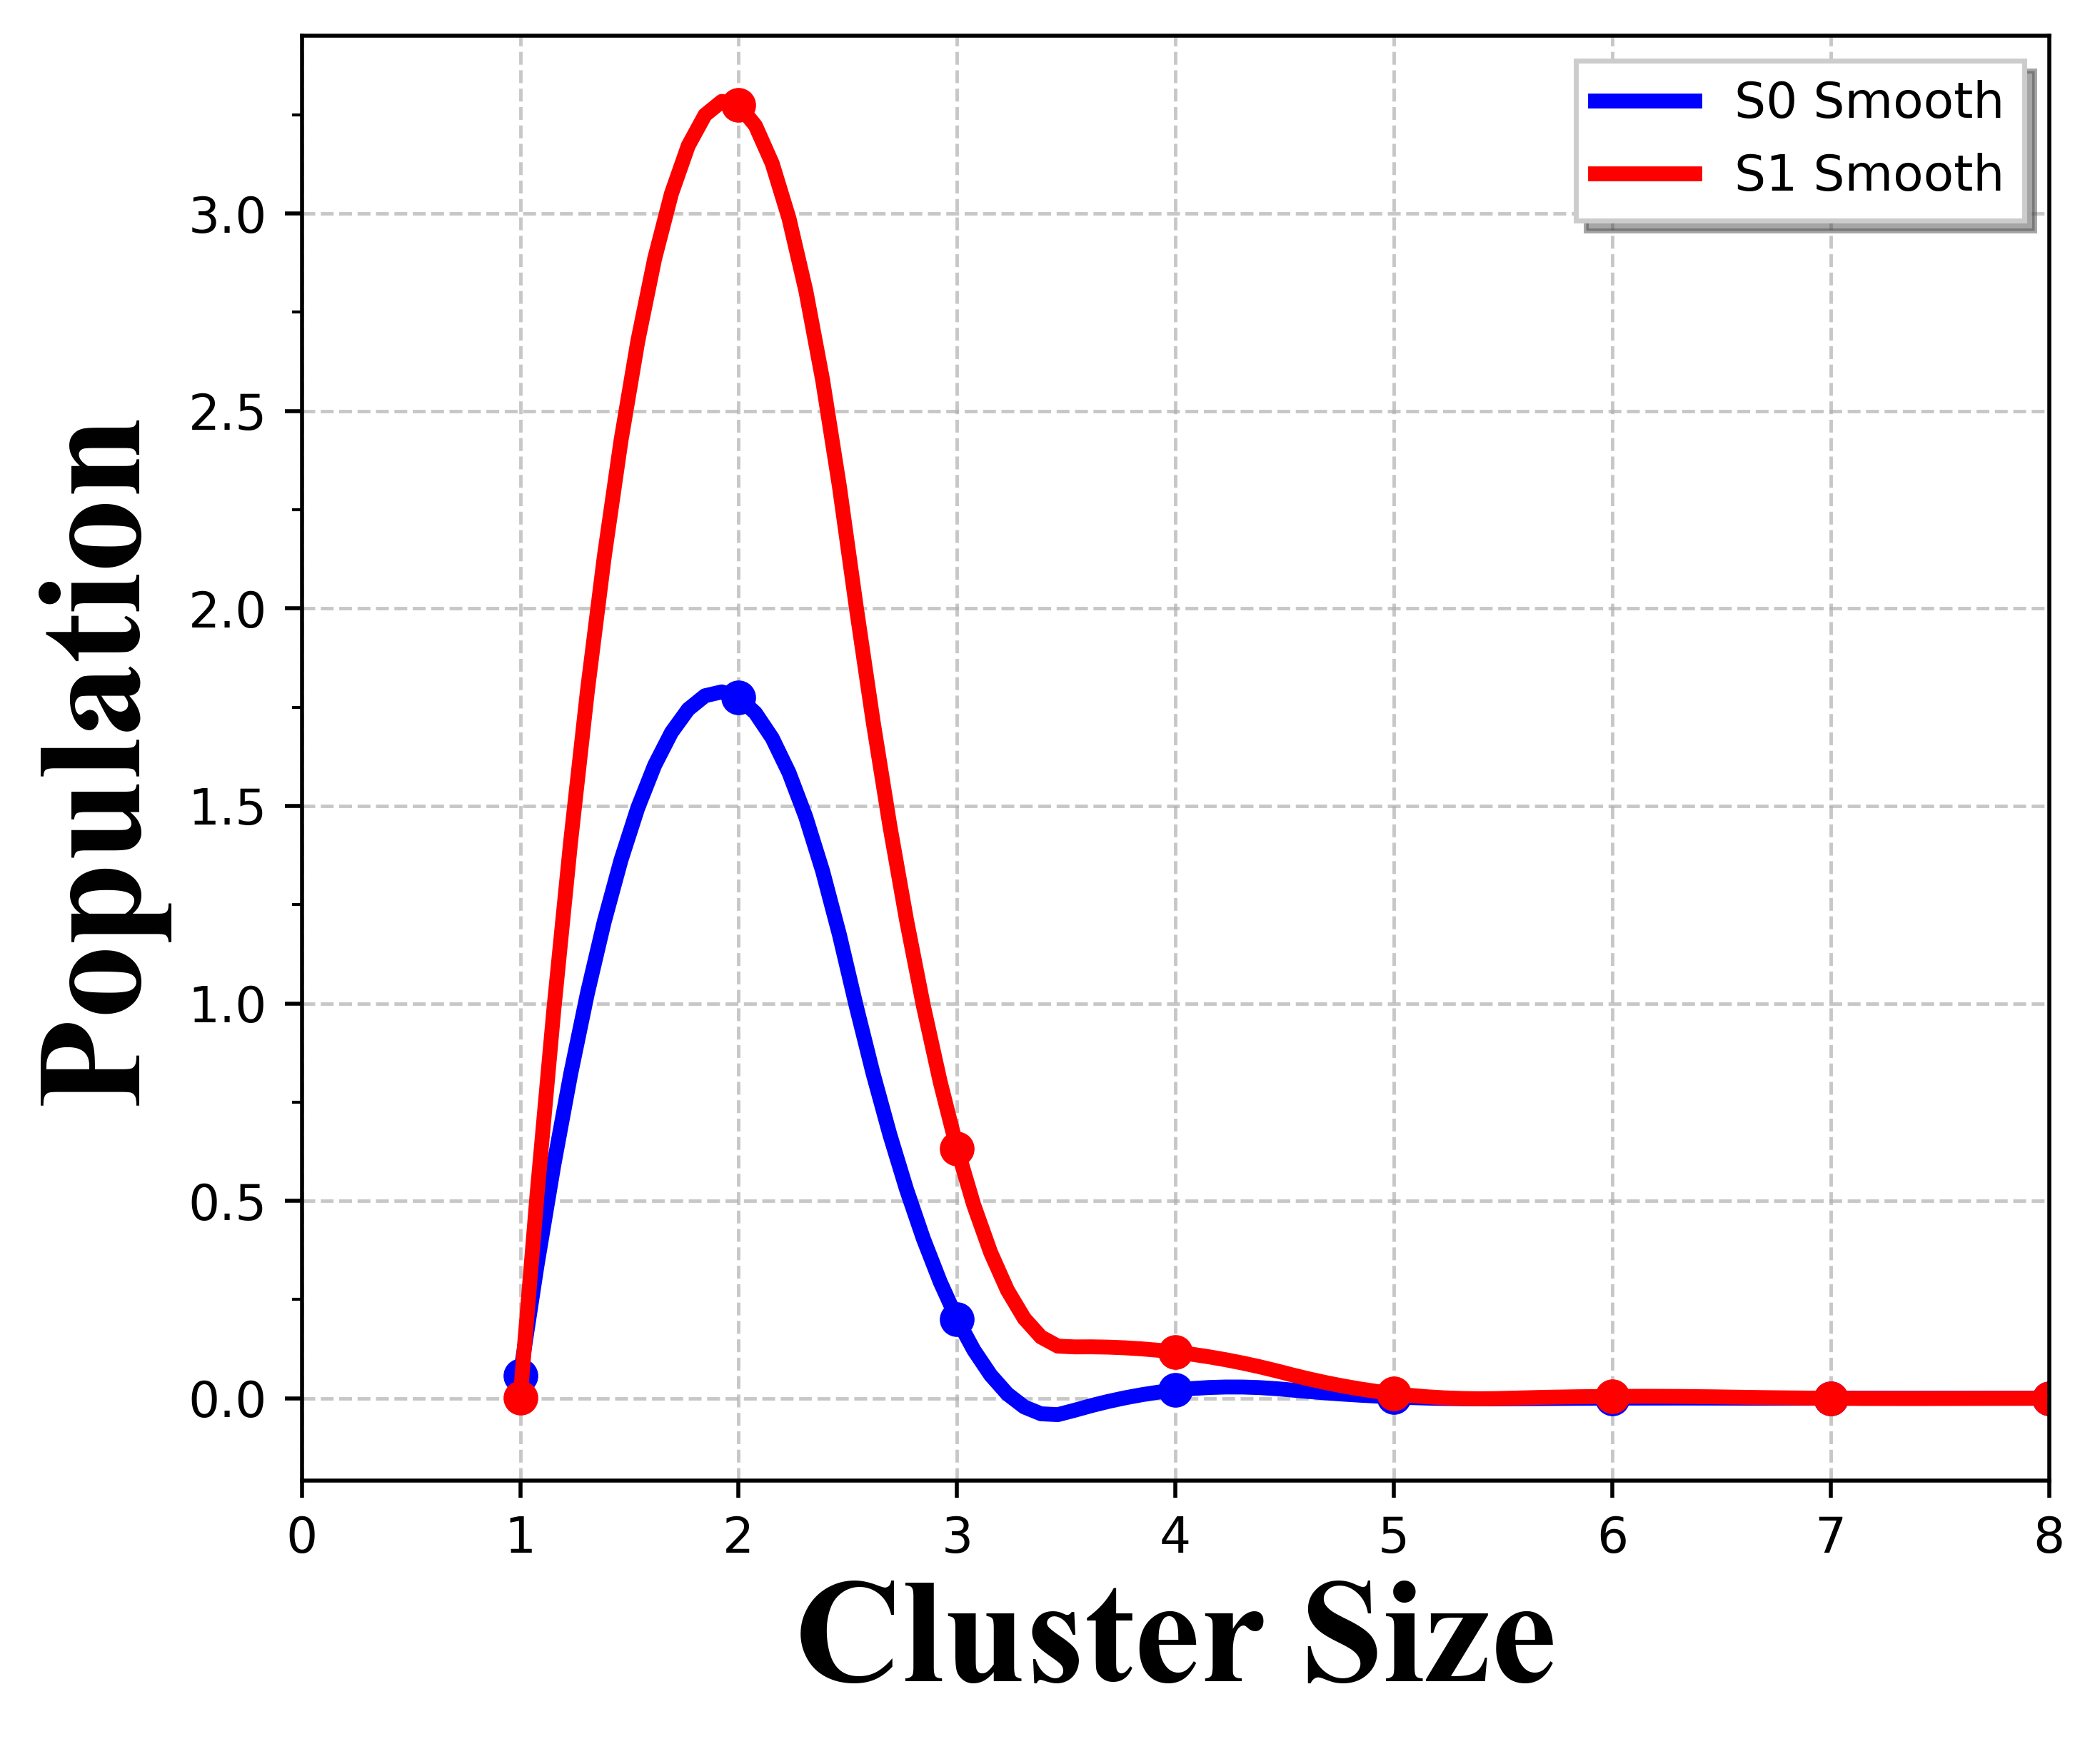

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from scipy.interpolate import make_interp_spline

# Define bins
bins = np.linspace(1, 24, endpoint=True, num=24)
bins_new = np.linspace(bins.min(), bins.max(), 300)

# Smoothing the data
spl = make_interp_spline(bins, average_clusters, k=2)  
spl1 = make_interp_spline(bins, average_clusters4, k=2)  
smooth_values = spl(bins_new)
smooth_values1 = spl1(bins_new)

# Define font for axis labels
font1 = {'family': 'Times New Roman', 'weight': 'bold', 'size': 30}

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 5), dpi=500)

# Scatter plot with smoothed lines
ax.plot(bins, average_clusters, 'o', color='blue', markersize=6)
ax.plot(bins_new, smooth_values, '-', color='blue', linewidth=3, label='S0 Smooth')

ax.plot(bins, average_clusters4, 'o', color='red', markersize=6)
ax.plot(bins_new, smooth_values1, '-', color='red', linewidth=3, label='S1 Smooth')

# Labels
ax.set_xlabel('Cluster Size', fontdict=font1)
ax.set_ylabel('Population', fontdict=font1)

# Grid and minor ticks
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
ax.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Legend
ax.legend(ncol=1, fontsize=18, frameon=True, fancybox=False, shadow=True, 
          loc='upper right', prop={'weight': 'normal'})

# Adjust layout and save
plt.tight_layout()
plt.xlim(0,8)
# plt.savefig('cluster_population1.png', dpi=500, bbox_inches="tight")

# Show plot
plt.show()


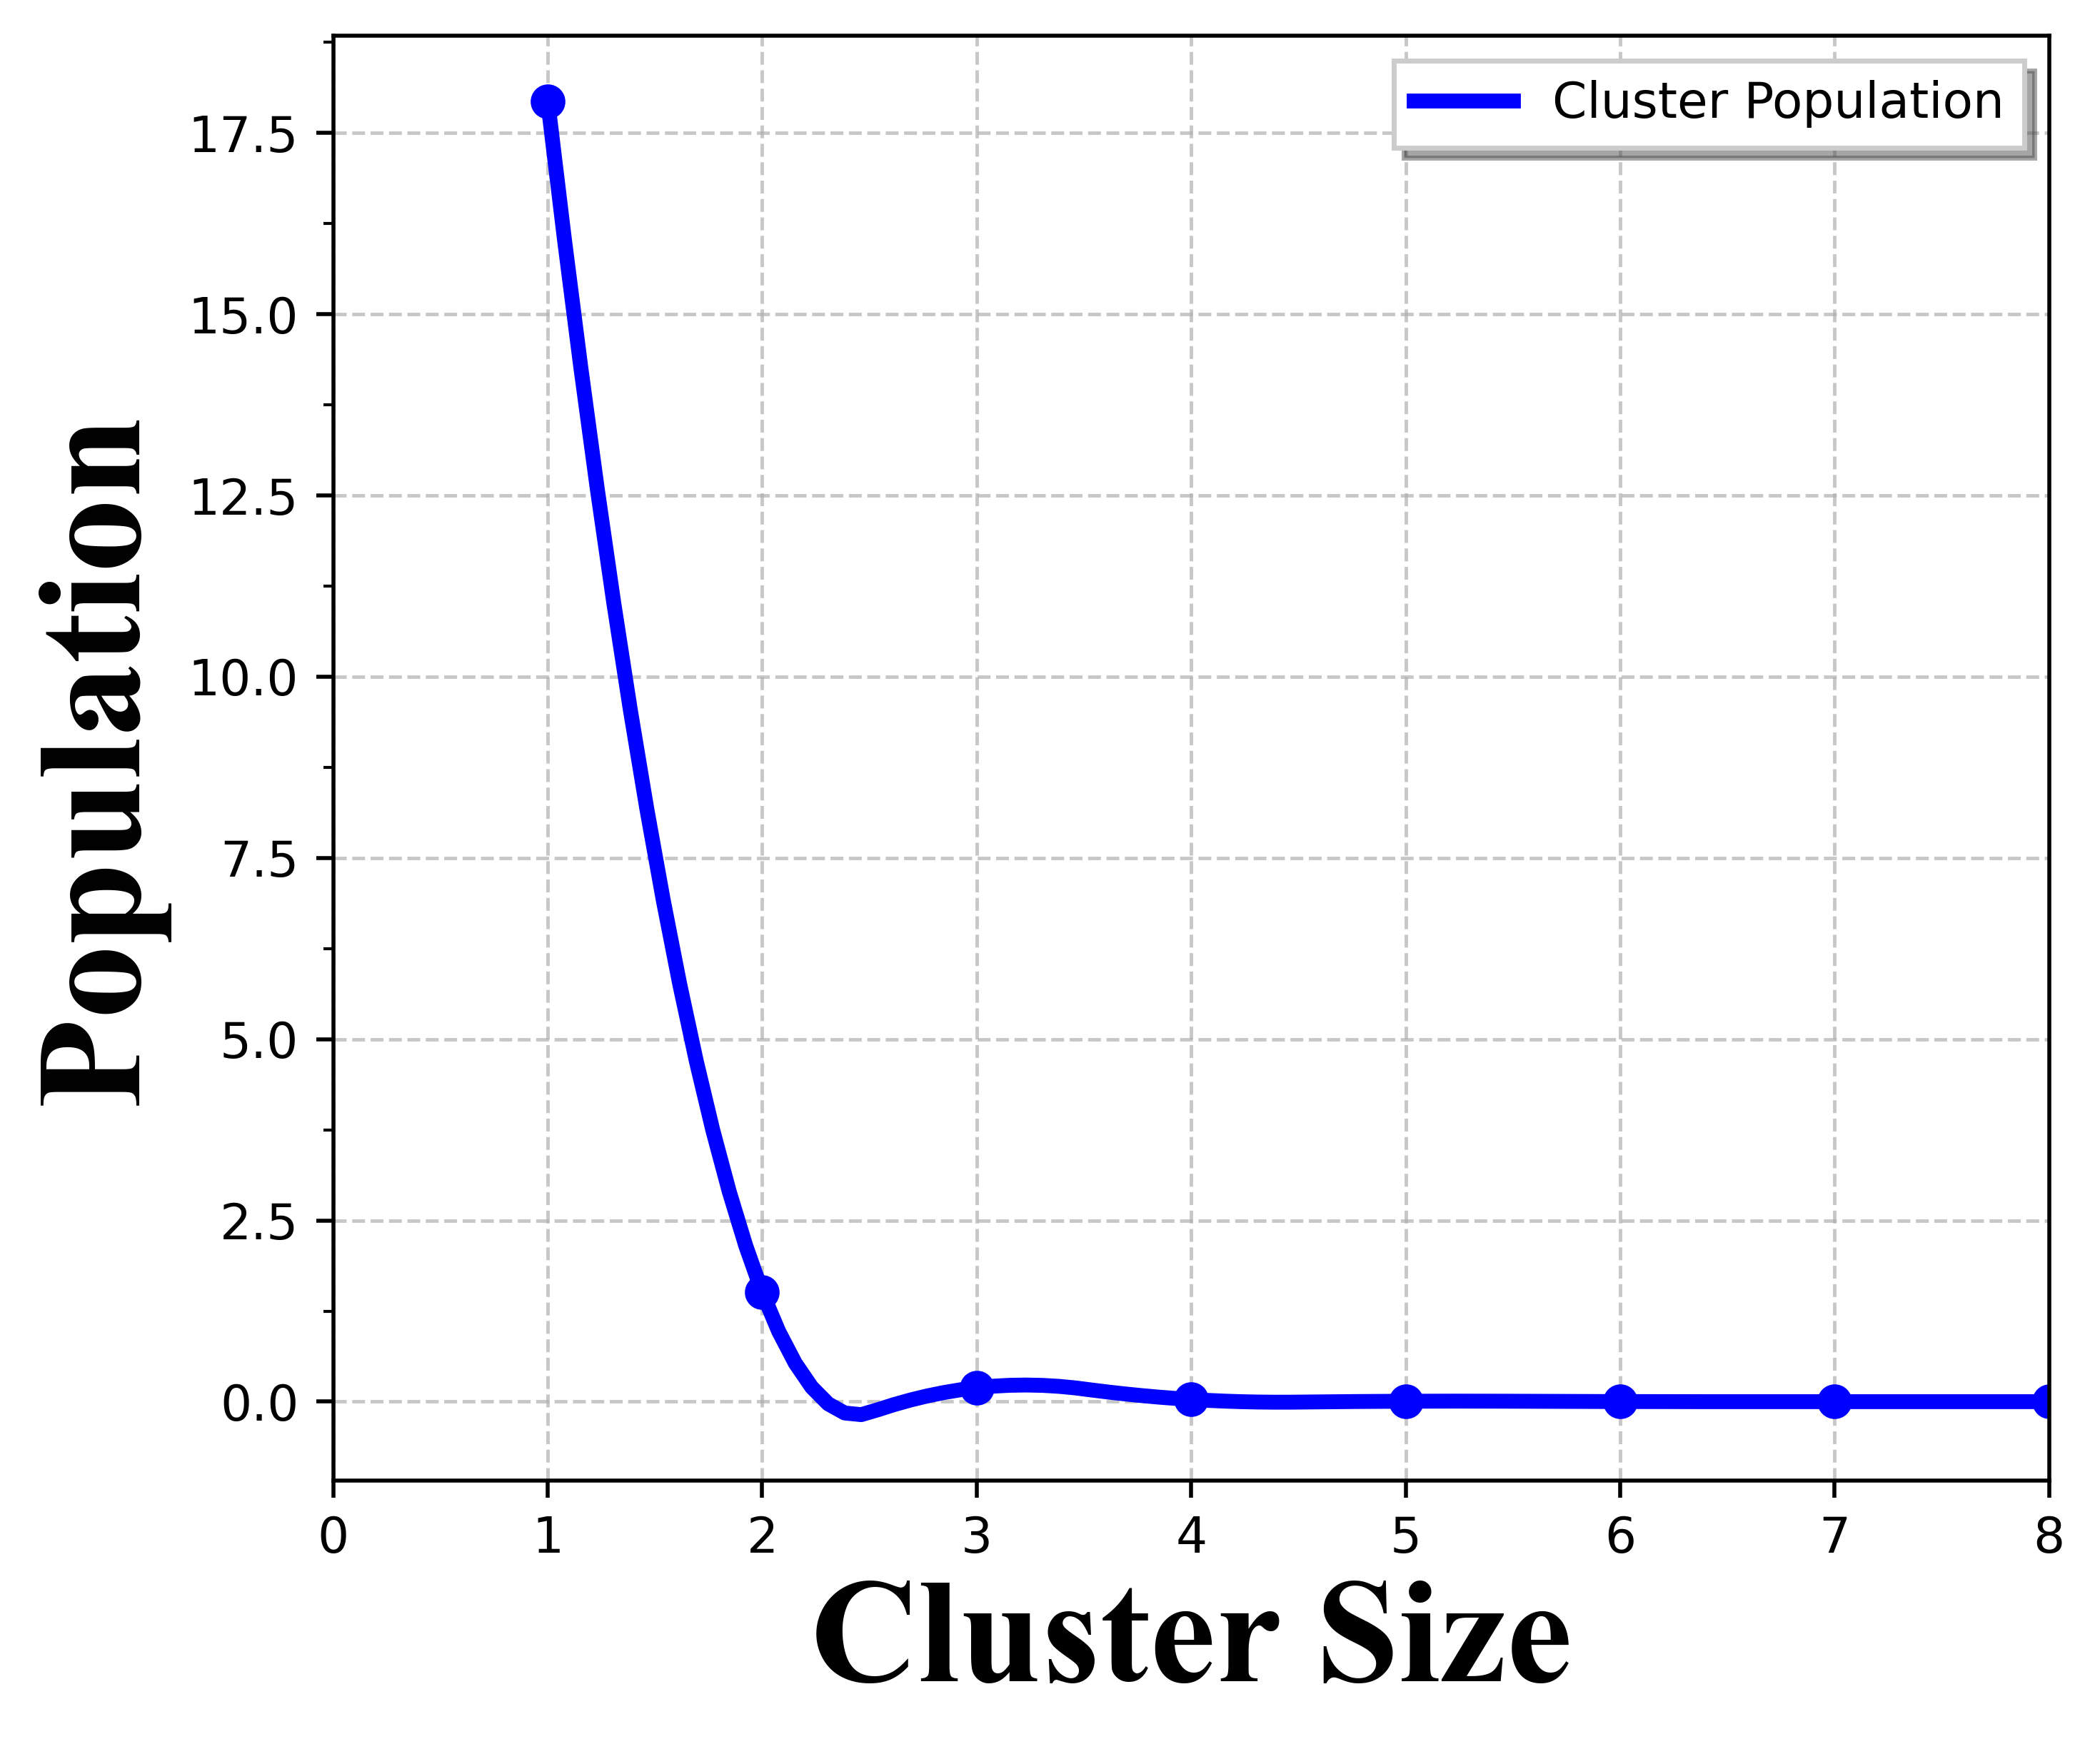

In [65]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from functools import reduce
import pandas as pd
import warnings
from copy import deepcopy

warnings.simplefilter("ignore", category=np.VisibleDeprecationWarning)

# Load the trajectory and topology
TPR = 'md_0_sim_resp_24trp-4mnt_500ns.tpr'
XTC = 'md_0_sim_resp_24trp-4mnt_500ns_pbc_center.xtc'
u = mda.Universe(TPR, XTC)

# Select TRP and TA5 molecules
trp = u.select_atoms("resname TRP")
ta = u.select_atoms("resname MNT")

# Parameters
cutoff_1 = 12.0  # TA-TRP interaction cutoff
cutoff_2 = 7.5   # TRP-TRP clustering cutoff
num_trp = len(trp.residues)

# Storage for cluster sizes
final_clusters = []

# Iterate over trajectory (starting from frame 5000)
for ts in u.trajectory[5000:]:

    # Calculate center-of-mass for TRP and TA5 molecules per frame
    trp_coms = trp.center_of_mass(compound="fragments", unwrap=True)
    ta_coms = ta.center_of_mass(compound="fragments", unwrap=True)

    # Find TRPs near TA5 molecules
    inside_trps_idxs = []
    for ta_com in ta_coms:
        dist1 = np.linalg.norm(trp_coms - ta_com, axis=1)  # Compute distances
        inside_trps_idxs.append(np.where(dist1 <= cutoff_1)[0])  # TRPs within cutoff

    # Flatten and ensure unique TRP indices inside TA5 cutoff
    inside_trps_idxs = np.unique(np.concatenate(inside_trps_idxs)) if inside_trps_idxs else np.array([])

    # Find TRPs outside the TA5 cutoff
    outside_trp_idxs = np.setdiff1d(np.arange(num_trp), inside_trps_idxs)

    # Debugging prints to check logic
    # print(f"Frame: {ts.frame}, Inside TRPs: {len(inside_trps_idxs)}, Outside TRPs: {len(outside_trp_idxs)}")

    # If no TRPs are outside, store only monomers
    clust_arr = np.zeros(num_trp)
    if len(outside_trp_idxs) == 0:
        clust_arr[0] += num_trp
        final_clusters.append(deepcopy(clust_arr))
        continue

    # Extract positions of outside TRPs
    outside_trps_pos = trp_coms[outside_trp_idxs]

    # Identify clusters among outside TRPs
    all_clust = []
    for i, j in combinations(range(len(outside_trp_idxs)), 2):
        dist = np.linalg.norm(outside_trps_pos[i] - outside_trps_pos[j])
        if dist <= cutoff_2:
            all_clust.append([i, j])

    # Merge overlapping clusters
    merged_clusters = []
    for cluster in all_clust:
        found = False
        for merged in merged_clusters:
            if any(trp in merged for trp in cluster):
                merged.update(cluster)
                found = True
                break
        if not found:
            merged_clusters.append(set(cluster))

    # Convert sets to lists
    merged_clusters = [list(cluster) for cluster in merged_clusters]

    # Store cluster size counts
    for cluster in merged_clusters:
        size = len(cluster) - 1
        clust_arr[size] += 1

    # Count monomers (TRPs not in clusters)
    clustered_trps = np.unique([trp for cluster in merged_clusters for trp in cluster])
    num_monomers = len(outside_trp_idxs) - len(clustered_trps)
    clust_arr[0] += num_monomers  # Add monomers to count

    final_clusters.append(deepcopy(clust_arr))

# Convert to DataFrame for analysis
final_clusters = np.array(final_clusters)
df1 = pd.DataFrame(final_clusters)
average_clusters = df1.mean(axis=0)

# print("Final Cluster Averages:\n", average_clusters)

# Plotting
import matplotlib.ticker
from scipy.interpolate import make_interp_spline

# Define bins
bins = np.linspace(1, num_trp, num=num_trp)
bins_new = np.linspace(bins.min(), bins.max(), 300)

# Smooth data
spl = make_interp_spline(bins, average_clusters, k=2)
smooth_values = spl(bins_new)

# Define font for axis labels
font1 = {'family': 'Times New Roman', 'weight': 'bold', 'size': 30}

# Create figure
fig, ax = plt.subplots(figsize=(6, 5), dpi=500)

# Scatter plot with smoothed lines
ax.plot(bins, average_clusters, 'o', color='blue', markersize=6)
ax.plot(bins_new, smooth_values, '-', color='blue', linewidth=3, label='Cluster Population')

# Labels
ax.set_xlabel('Cluster Size', fontdict=font1)
ax.set_ylabel('Population', fontdict=font1)

# Grid
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
ax.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Legend
ax.legend(ncol=1, fontsize=18, frameon=True, fancybox=False, shadow=True, 
          loc='upper right', prop={'weight': 'normal'})

# Adjust layout
plt.tight_layout()
plt.xlim(0, 8)

# Show plot
plt.show()


In [66]:
average_clusters

0     17.937213
1      1.508098
2      0.192561
3      0.030194
4      0.005799
5      0.001400
6      0.000000
7      0.000000
8      0.000000
9      0.000000
10     0.000000
11     0.000000
12     0.000000
13     0.000000
14     0.000000
15     0.000000
16     0.000000
17     0.000000
18     0.000000
19     0.000000
20     0.000000
21     0.000000
22     0.000000
23     0.000000
dtype: float64

In [73]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rdf
import pandas as pd

# Load the trajectory and topology
TPR = 'md_0_sim_resp_24trp-3ta_500ns.tpr'
XTC = 'md_0_sim_resp_24trp-3ta_500ns_pbc_center.xtc'
u = mda.Universe(TPR, XTC)

# Select TRP and TA atoms
trp = u.select_atoms("resname TRP")
ta = u.select_atoms("resname TA5")

final_clusters = []

for ts in u.trajectory[5000:]:  # Adjust frame range as needed
    clust_arr = np.zeros(24)
    trp_coms = trp.center_of_mass(unwrap=True, compound="residues")
    ta_coms = ta.center_of_mass(unwrap=True, compound="residues")
    
    # Find TRPs near any TA5 (inside)
    cutoff_1 = 12.0
    inside_trps_idxs = []
    for ta_pos in ta_coms:
        distances = np.linalg.norm(trp_coms - ta_pos, axis=1)
        inside_trps_idxs.extend(np.where(distances <= cutoff_1)[0])
    inside_trps_idxs = np.unique(inside_trps_idxs)
    
    # TRPs not near any TA5 (outside)
    all_trp_indices = np.arange(len(trp_coms))
    outside_trp_idxs = np.setdiff1d(all_trp_indices, inside_trps_idxs)
    outside_trps_pos = trp_coms[outside_trp_idxs]
    M = len(outside_trp_idxs)
    
    if M == 0:
        final_clusters.append(clust_arr)
        continue
    
    # Cluster outside TRPs using Union-Find
    cutoff_2 = 7.5
    parent = list(range(M))
    
    def find(u):
        while parent[u] != u:
            parent[u] = parent[parent[u]]  # Path compression
            u = parent[u]
        return u
    
    def union(u, v):
        root_u = find(u)
        root_v = find(v)
        if root_u != root_v:
            parent[root_v] = root_u
    
    for i in range(M):
        for j in range(i+1, M):
            dist = np.linalg.norm(outside_trps_pos[i] - outside_trps_pos[j])
            if dist <= cutoff_2:
                union(i, j)
    
    # Determine cluster sizes
    clusters = {}
    for node in range(M):
        root = find(node)
        clusters.setdefault(root, []).append(node)
    cluster_sizes = [len(c) for c in clusters.values()]
    
    # Update cluster counts
    for s in cluster_sizes:
        if s == 1:
            clust_arr[0] += 1  # Monomers
        else:
            clust_arr[s-1] += s  # s TRPs in cluster of size s
    
    final_clusters.append(clust_arr)

# Average the results
df = pd.DataFrame(final_clusters)
average_clusters1 = df.mean(axis=0)



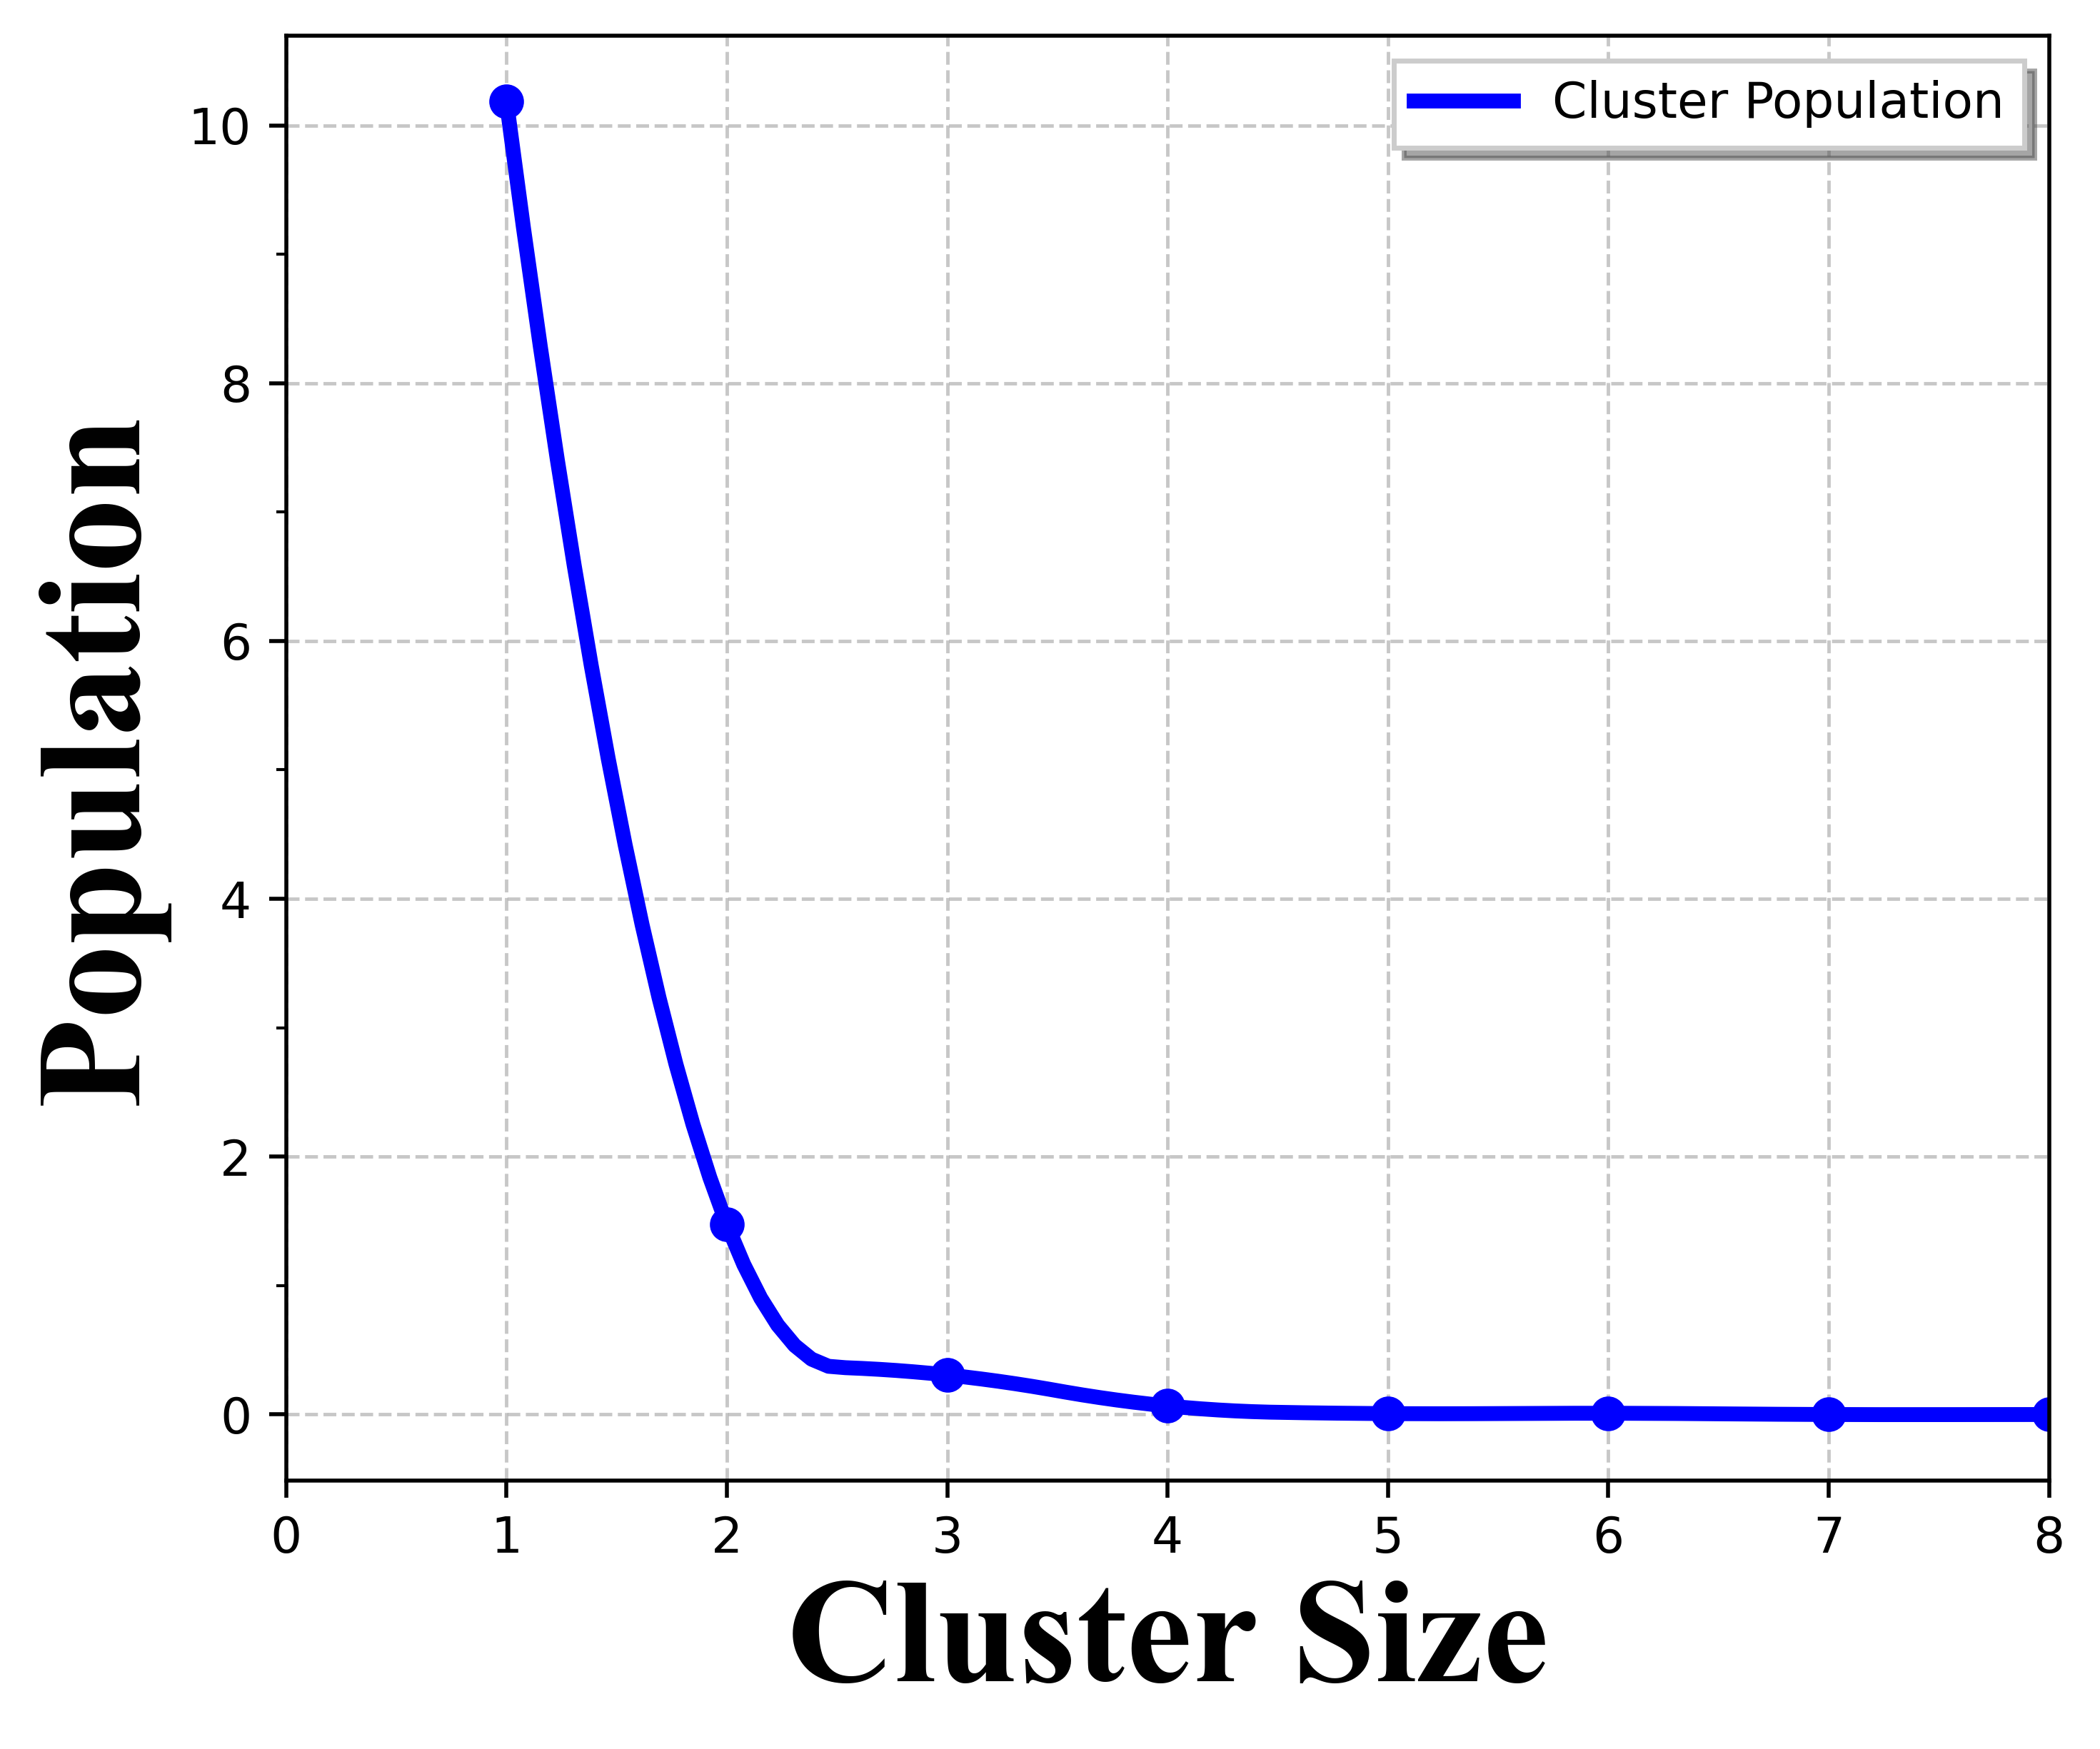

In [74]:
# Plotting
import matplotlib.ticker
from scipy.interpolate import make_interp_spline

# Define bins
bins = np.linspace(1, num_trp, num=num_trp)
bins_new = np.linspace(bins.min(), bins.max(), 300)

# Smooth data
spl = make_interp_spline(bins, average_clusters1, k=2)
smooth_values = spl(bins_new)

# Define font for axis labels
font1 = {'family': 'Times New Roman', 'weight': 'bold', 'size': 30}

# Create figure
fig, ax = plt.subplots(figsize=(6, 5), dpi=500)

# Scatter plot with smoothed lines
ax.plot(bins, average_clusters1, 'o', color='blue', markersize=6)
ax.plot(bins_new, smooth_values, '-', color='blue', linewidth=3, label='Cluster Population')

# Labels
ax.set_xlabel('Cluster Size', fontdict=font1)
ax.set_ylabel('Population', fontdict=font1)

# Grid
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
ax.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Legend
ax.legend(ncol=1, fontsize=18, frameon=True, fancybox=False, shadow=True, 
          loc='upper right', prop={'weight': 'normal'})

# Adjust layout
plt.tight_layout()
plt.xlim(0, 8)

# Show plot
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/MDAnalysis/analysis/rdf.py:339: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/opt/anaconda3/lib/python3.12/site-packages/MDAnalysis/analysis/rdf.py:347: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


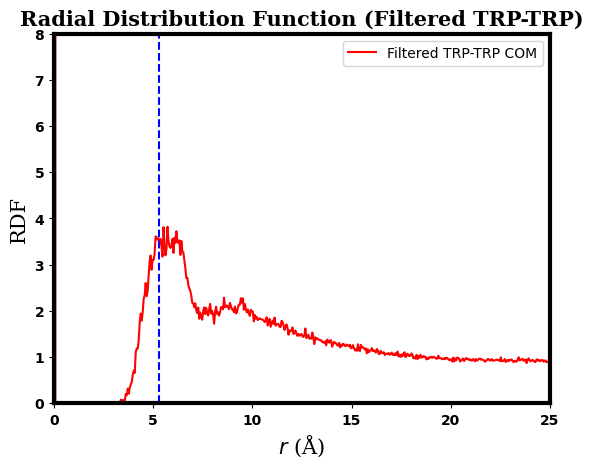

In [1]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rdf
from itertools import combinations
from functools import reduce
import pandas as pd

import warnings
warnings.simplefilter("ignore", category=np.VisibleDeprecationWarning)

TPR = 'md_0_sim_24trp-1ta_500ns.tpr'
XTC = 'md_0_sim_24trp-1ta_500ns_pbc_center.xtc'

# Load the trajectory and topology
u = mda.Universe(TPR, XTC)

# Select TRP and TA atoms
trp = u.select_atoms("resname TRP")
ta = u.select_atoms("resname ta")

# # Calculate the center of mass (COM) of TRP and TA molecules
trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
ta_coms = ta.center_of_mass(unwrap=True, compound="fragments")

# Define a class to replace TRP and TA positions with their COM
class ReplaceWithCOM:
    def __init__(self, molecule, atomname):
        self.molecule = molecule
        self.com_atoms = molecule.select_atoms(f"name {atomname}")
        assert self.get_com().shape == self.com_atoms.positions.shape
        
    def get_com(self):
        return self.molecule.center_of_mass(unwrap=True, compound="fragments")
    
    def __call__(self, ts):
        self.com_atoms.positions = self.get_com()
        return ts


final_clusters = []

for ts in u.trajectory[5000:]:

    clust_arr = np.zeros(24)
    # Calculate distances from TA to all TRPs and store them in dist1
    trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
    ta_coms = ta.center_of_mass(unwrap=True, compound="fragments")
    dist1 = []
    for i in trp_coms:
        dist1.append(np.linalg.norm(i-ta_coms[0]))
    #print(dist1)
    
    # Identify TRPs outside cutoff
    cutoff_1 = 15.0
    outside_trps_idxs = np.where(np.array(dist1) >= cutoff_1)[0]
    # print(len(outside_trps_idxs))
    
    # Identify cluster between only those TRPs outside TA
    outside_trps_pos = trp_coms[outside_trps_idxs]
    
# Replace positions with COM
com_atoms = trp.select_atoms("resname TRP and name C8")
# ta_com_atoms = ta.select_atoms("resname ta and (name C1 or name C2 or name C3 or name C4 or name C5 or name O1 or name C6)")
com_atoms1 = ta.select_atoms("resname ta and name C3")    

com_atoms.positions = trp.center_of_mass(unwrap=True, compound="fragments")
com_atoms1.positions = ta.center_of_mass(unwrap=True, compound="fragments")


# Calculate RDF for the filtered TRP-TRP interactions
rdf_trp_trp_filtered = rdf.InterRDF(com_atoms[outside_trps_idxs], 
                                    com_atoms[outside_trps_idxs], 
                                    nbins=600, range=(0, 30)).run()


# Plot the RDF
font1 = {'family':'serif','color':'black','size':15}
plt.title('Radial Distribution Function (Filtered TRP-TRP)', fontdict=font1, fontweight='bold')

plt.plot(rdf_trp_trp_filtered.bins, rdf_trp_trp_filtered.rdf, label="Filtered TRP-TRP COM", color='red')
plt.xlabel(r"$r$ (Å)", fontdict=font1)
plt.ylabel("RDF", fontdict=font1)
plt.legend(loc="best")

plt.figure(1, figsize=(5,4), dpi=2000)
border_line_width = 3
plt.gca().spines['top'].set_linewidth(border_line_width)
plt.gca().spines['right'].set_linewidth(border_line_width)
plt.gca().spines['bottom'].set_linewidth(border_line_width)
plt.gca().spines['left'].set_linewidth(border_line_width)
plt.axvline(x=5.3, color='b', linestyle='--', label='Cutoff at 5.14 Å')

plt.xlim(0, 25)
plt.ylim(0, 8)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
#plt.savefig('rdf_trp_trp_filtered.png', dpi=2000)
plt.show()

In [12]:
final_clusters = []

for ts in u.trajectory[5000:]:

    clust_arr = np.zeros(24)
    # Calculate distances from TA to all TRPs and store them in dist1
    trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
    ta_coms = ta.center_of_mass(unwrap=True, compound="fragments")
    dist1 = []
    for i in trp_coms:
        dist1.append(np.linalg.norm(i-ta_coms[0]))
    #print(dist1)
    
    # Identify TRPs outside cutoff
    cutoff_1 = 15.0
    outside_trps_idxs = np.where(np.array(dist1) >= cutoff_1)[0]
    print(len(outside_trps_idxs))
    
    # Identify cluster between only those TRPs outside TA
    outside_trps_pos = trp_coms[outside_trps_idxs]


24
23
24
23
24
23
22
22
22
22
22
21
22
22
21
21
22
23
21
22
23
22
22
22
22
22
22
22
22
23
22
23
23
22
22
22
22
22
22
22
23
23
23
23
23
23
22
22
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
22
21
21
21
21
22
21
23
22
23
22
22
22
22
22
22
22
22
22
22
22
21
21
21
21
21
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
19
19
19
18
19
18
18
18
18
18
17
18
18
18
18
18
18
18
17
17
18
18
17
18
17
17
18
18
18
18
18
18
18
17
19
18
18
18
18
17
17
17
17
17
16
16
16
16
17
16
16
17
17
18
17
17
17
19
18
17
18
18
17
17
18
18
17
17
17
18
19
17
17
18
18
17
18
18
18
18
18
18
18
20
20
20
20
20
20
20
20
19
18
18
18
18
18
18
19
18
18
18
18
18
18
19
19
19
19
18
18
18
19
19
19
20
19
20
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
18
19
19
19
19
18
19
19
19
19
19
18
19
19
19
18
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
23
21
21
21
20
20
23
19
20
21
20
19
19
20
19
19
20
19
18
18
19
19
18
18
19
19
19
18
18
18
18
18
19
19
19
18
18
18
18
18
19
19
19
19
19
20
19
19
20
19
19
19
19
19
19
1

In [13]:
# Replace positions with COM
com_atoms = trp.select_atoms("resname TRP and name C8")
# ta_com_atoms = ta.select_atoms("resname ta and (name C1 or name C2 or name C3 or name C4 or name C5 or name O1 or name C6)")
com_atoms1 = ta.select_atoms("resname ta and name C3")

In [14]:
com_atoms.positions = trp.center_of_mass(unwrap=True, compound="fragments")
com_atoms1.positions = ta.center_of_mass(unwrap=True, compound="fragments")

In [15]:

# Calculate RDF for the filtered TRP-TRP interactions
rdf_trp_trp_filtered = rdf.InterRDF(com_atoms[outside_trps_idxs], 
                                    com_atoms[outside_trps_idxs], 
                                    nbins=600, range=(0, 30)).run()

/opt/anaconda3/lib/python3.12/site-packages/MDAnalysis/analysis/rdf.py:339: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/opt/anaconda3/lib/python3.12/site-packages/MDAnalysis/analysis/rdf.py:347: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


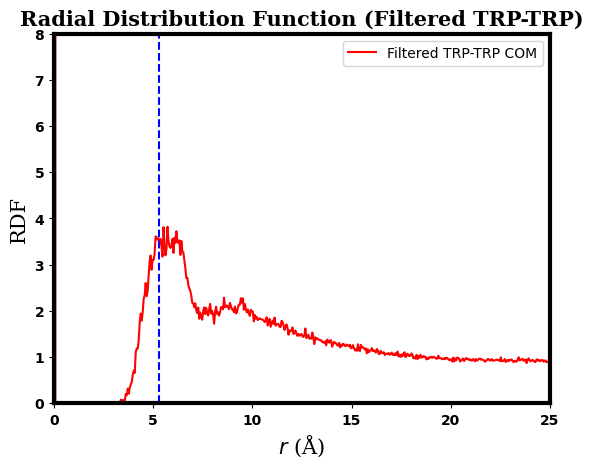

In [16]:
# Plot the RDF
font1 = {'family':'serif','color':'black','size':15}
plt.title('Radial Distribution Function (Filtered TRP-TRP)', fontdict=font1, fontweight='bold')

plt.plot(rdf_trp_trp_filtered.bins, rdf_trp_trp_filtered.rdf, label="Filtered TRP-TRP COM", color='red')
plt.xlabel(r"$r$ (Å)", fontdict=font1)
plt.ylabel("RDF", fontdict=font1)
plt.legend(loc="best")

plt.figure(1, figsize=(5,4), dpi=2000)
border_line_width = 3
plt.gca().spines['top'].set_linewidth(border_line_width)
plt.gca().spines['right'].set_linewidth(border_line_width)
plt.gca().spines['bottom'].set_linewidth(border_line_width)
plt.gca().spines['left'].set_linewidth(border_line_width)
plt.axvline(x=5.3, color='b', linestyle='--', label='Cutoff at 5.14 Å')

plt.xlim(0, 25)
plt.ylim(0, 8)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
#plt.savefig('rdf_trp_trp_filtered.png', dpi=2000)
plt.show()

  0%|          | 0/10001 [00:00<?, ?it/s]

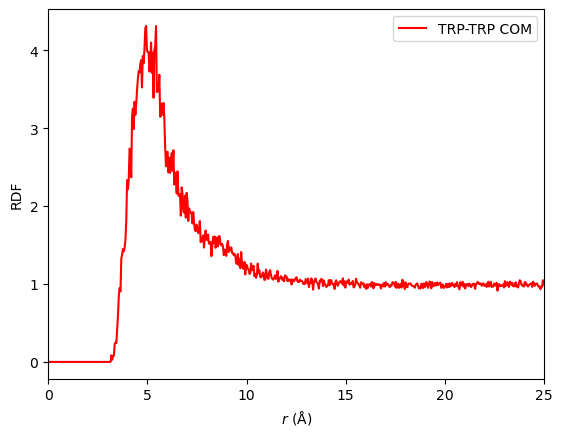

In [18]:
import MDAnalysis as mda
import MDAnalysisData.datasets
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rdf
from MDAnalysis.analysis.distances import distance_array
import nglview as nv

TPR = 'md_0_sim_resp_24trp_500ns.tpr'
XTC = 'md_0_sim_resp_24trp_500ns_pbc_center.xtc'

# Load the trajectory and topology
u = mda.Universe(TPR, XTC)

trp = u.select_atoms("resname TRP")
trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
com_atoms = trp.select_atoms("resname TRP and name C8")

com_atoms.positions = trp.center_of_mass(unwrap=True, compound="fragments")

class replace_with_COM:
    """Replace special atom `atomname` in each fragment with COM of the fragment."""
    def __init__(self, trp, atomname):
        self.trp = trp
        self.com_atoms = trp.select_atoms(f"name {atomname}")
        
        # sanity check
        assert self.get_com().shape == self.com_atoms.positions.shape
        
    def get_com(self):
        return self.trp.center_of_mass(unwrap=True, compound="fragments")
    
    def __call__(self, ts):
        self.com_atoms.positions = self.get_com()
        return ts
                                              
                                              
comRDF = rdf.InterRDF(com_atoms, com_atoms, 
                      nbins=600,range=(0, 25), exclusion_block=(1, 1)).run(verbose=True)      

plt.plot(comRDF.bins, comRDF.rdf, label="TRP-TRP COM", color="red")
plt.xlabel(r"$r$ (Å)")
plt.ylabel("RDF")
plt.legend(loc="best");
plt.xlim(0,25)
plt.show()                                   

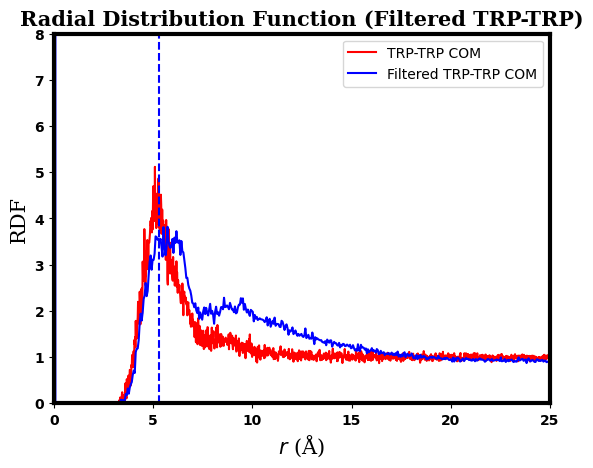

In [18]:
# Plot the RDF
font1 = {'family':'serif','color':'black','size':15}
plt.title('Radial Distribution Function (Filtered TRP-TRP)', fontdict=font1, fontweight='bold')
plt.plot(comRDF.bins, comRDF.rdf, label="TRP-TRP COM", color="red")

plt.plot(rdf_trp_trp_filtered.bins, rdf_trp_trp_filtered.rdf, label="Filtered TRP-TRP COM", color='blue')
plt.xlabel(r"$r$ (Å)", fontdict=font1)
plt.ylabel("RDF", fontdict=font1)
plt.legend(loc="best")

plt.figure(1, figsize=(5,4), dpi=2000)
border_line_width = 3
plt.gca().spines['top'].set_linewidth(border_line_width)
plt.gca().spines['right'].set_linewidth(border_line_width)
plt.gca().spines['bottom'].set_linewidth(border_line_width)
plt.gca().spines['left'].set_linewidth(border_line_width)
plt.axvline(x=5.3, color='b', linestyle='--', label='Cutoff at 5.14 Å')

plt.xlim(0, 25)
plt.ylim(0, 8)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
#plt.savefig('rdf_trp_trp_filtered.png', dpi=2000)
plt.show()

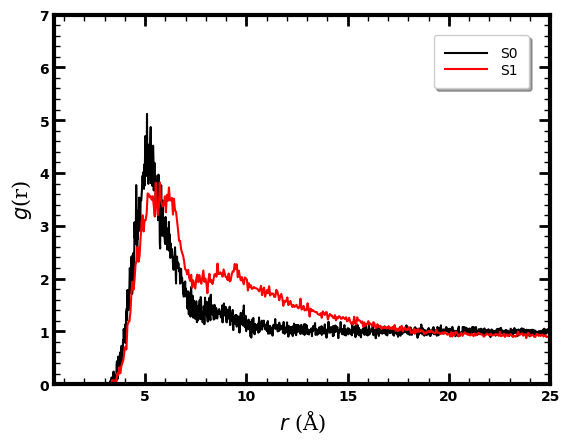

In [19]:
font1 = {'family':'serif','color':'black','size':15}
plt.plot(comRDF.bins, comRDF.rdf, label="S0",color='black')
plt.plot(rdf_trp_trp_filtered.bins, rdf_trp_trp_filtered.rdf, label="S1", color='red')

plt.xlabel(r"$r$ (Å)",fontdict=font1)
plt.ylabel(r"$g$(r)",fontdict=font1)
plt.legend(loc="best");

plt.figure(1,figsize = (5,4),dpi=2000)
border_line_width = 3
plt.gca().spines['top'].set_linewidth(border_line_width)
plt.gca().spines['right'].set_linewidth(border_line_width)
plt.gca().spines['bottom'].set_linewidth(border_line_width)
plt.gca().spines['left'].set_linewidth(border_line_width)

plt.xlim(0.5,25)
plt.ylim(0,7)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(axis='x', which='major', direction='in', length=8, width=2, color='black')
plt.tick_params(axis='y', which='major', direction='in', length=8, width=2, color='black')
plt.gca().tick_params(axis='both', which='minor', color='black', width=1, length=4, bottom=True, top=True, left=True, right=True, direction='in')
plt.minorticks_on()
plt.legend(loc="upper right", labelspacing=0.2, handlelength=3.0, handletextpad=1.0, borderaxespad=1.5, borderpad=0.8, fontsize=10, fancybox=True, shadow=True)
plt.savefig('rdf_all_sys.png',dpi= 1000) # Other extensions: png, svg
plt.grid(False)
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/MDAnalysis/analysis/rdf.py:339: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/opt/anaconda3/lib/python3.12/site-packages/MDAnalysis/analysis/rdf.py:347: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


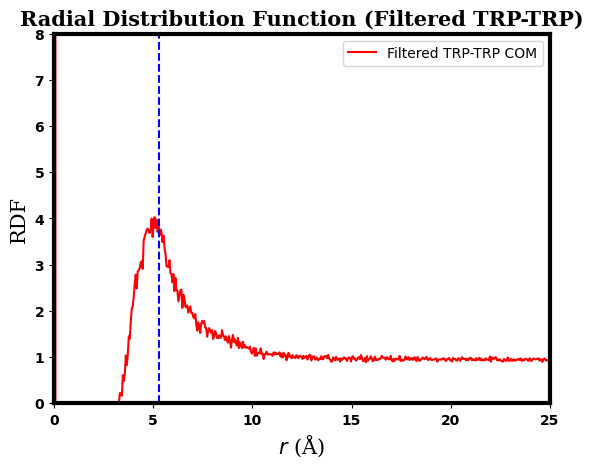

In [15]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rdf
from itertools import combinations
from functools import reduce
import pandas as pd

import warnings
warnings.simplefilter("ignore", category=np.VisibleDeprecationWarning)
TPR = 'md_0_sim_resp_24trp-1sbt_500ns.tpr'
XTC = 'md_0_sim_resp_24trp-1sbt_500ns_pbc_center.xtc'

# Load the trajectory and topology
u = mda.Universe(TPR, XTC)

# Select TRP and TA atoms
trp = u.select_atoms("resname TRP")
ta = u.select_atoms("resname SBT")

# # Calculate the center of mass (COM) of TRP and TA molecules
trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
ta_coms = ta.center_of_mass(unwrap=True, compound="fragments")

# Define a class to replace TRP and TA positions with their COM
class ReplaceWithCOM:
    def __init__(self, molecule, atomname):
        self.molecule = molecule
        self.com_atoms = molecule.select_atoms(f"name {atomname}")
        assert self.get_com().shape == self.com_atoms.positions.shape
        
    def get_com(self):
        return self.molecule.center_of_mass(unwrap=True, compound="fragments")
    
    def __call__(self, ts):
        self.com_atoms.positions = self.get_com()
        return ts


final_clusters = []

for ts in u.trajectory[5000:]:

    clust_arr = np.zeros(24)
    # Calculate distances from TA to all TRPs and store them in dist1
    trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
    ta_coms = ta.center_of_mass(unwrap=True, compound="fragments")
    dist1 = []
    for i in trp_coms:
        dist1.append(np.linalg.norm(i-ta_coms[0]))
    #print(dist1)
    
    # Identify TRPs outside cutoff
    cutoff_1 = 10.0
    outside_trps_idxs = np.where(np.array(dist1) >= cutoff_1)[0]
    # print(len(outside_trps_idxs))
    
    # Identify cluster between only those TRPs outside TA
    outside_trps_pos = trp_coms[outside_trps_idxs]
    
# Replace positions with COM
com_atoms = trp.select_atoms("resname TRP and name C8")
# ta_com_atoms = ta.select_atoms("resname ta and (name C1 or name C2 or name C3 or name C4 or name C5 or name O1 or name C6)")
com_atoms1 = ta.select_atoms("resname ta and name C3")    

com_atoms.positions = trp.center_of_mass(unwrap=True, compound="fragments")
# com_atoms1.positions = ta.center_of_mass(unwrap=True, compound="fragments")


# Calculate RDF for the filtered TRP-TRP interactions
rdf_trp_trp_filtered1 = rdf.InterRDF(com_atoms[outside_trps_idxs], 
                                    com_atoms[outside_trps_idxs], 
                                    nbins=600, range=(0, 30)).run()


# Plot the RDF
font1 = {'family':'serif','color':'black','size':15}
plt.title('Radial Distribution Function (Filtered TRP-TRP)', fontdict=font1, fontweight='bold')

plt.plot(rdf_trp_trp_filtered1.bins, rdf_trp_trp_filtered1.rdf, label="Filtered TRP-TRP COM", color='red')
plt.xlabel(r"$r$ (Å)", fontdict=font1)
plt.ylabel("RDF", fontdict=font1)
plt.legend(loc="best")

plt.figure(1, figsize=(5,4), dpi=2000)
border_line_width = 3
plt.gca().spines['top'].set_linewidth(border_line_width)
plt.gca().spines['right'].set_linewidth(border_line_width)
plt.gca().spines['bottom'].set_linewidth(border_line_width)
plt.gca().spines['left'].set_linewidth(border_line_width)
plt.axvline(x=5.3, color='b', linestyle='--', label='Cutoff at 5.14 Å')

plt.xlim(0, 25)
plt.ylim(0, 8)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
#plt.savefig('rdf_trp_trp_filtered.png', dpi=2000)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/MDAnalysis/analysis/rdf.py:339: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/opt/anaconda3/lib/python3.12/site-packages/MDAnalysis/analysis/rdf.py:347: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


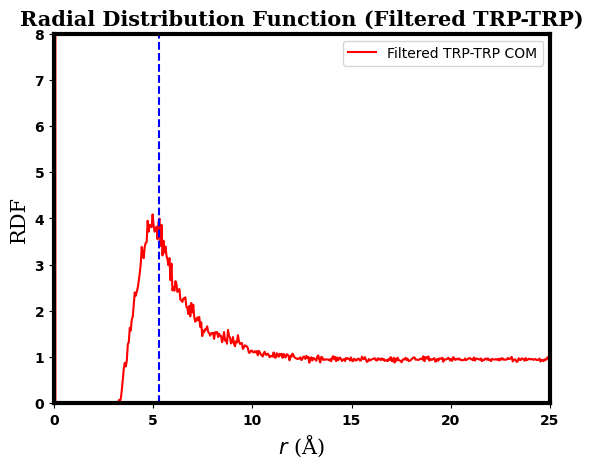

In [16]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rdf
from itertools import combinations
from functools import reduce
import pandas as pd

import warnings
warnings.simplefilter("ignore", category=np.VisibleDeprecationWarning)

TPR = 'md_0_sim_resp_24trp-1mnt_500ns.tpr'
XTC = 'md_0_sim_resp_24trp-1mnt_500ns_pbc_center.xtc'

# Load the trajectory and topology
u = mda.Universe(TPR, XTC)

# Select TRP and TA atoms
trp = u.select_atoms("resname TRP")
ta = u.select_atoms("resname MNT")

# # Calculate the center of mass (COM) of TRP and TA molecules
trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
ta_coms = ta.center_of_mass(unwrap=True, compound="fragments")

# Define a class to replace TRP and TA positions with their COM
class ReplaceWithCOM:
    def __init__(self, molecule, atomname):
        self.molecule = molecule
        self.com_atoms = molecule.select_atoms(f"name {atomname}")
        assert self.get_com().shape == self.com_atoms.positions.shape
        
    def get_com(self):
        return self.molecule.center_of_mass(unwrap=True, compound="fragments")
    
    def __call__(self, ts):
        self.com_atoms.positions = self.get_com()
        return ts


final_clusters = []

for ts in u.trajectory[5000:]:

    clust_arr = np.zeros(24)
    # Calculate distances from TA to all TRPs and store them in dist1
    trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
    ta_coms = ta.center_of_mass(unwrap=True, compound="fragments")
    dist1 = []
    for i in trp_coms:
        dist1.append(np.linalg.norm(i-ta_coms[0]))
    #print(dist1)
    
    # Identify TRPs outside cutoff
    cutoff_1 = 10.0
    outside_trps_idxs = np.where(np.array(dist1) >= cutoff_1)[0]
    # print(len(outside_trps_idxs))
    
    # Identify cluster between only those TRPs outside TA
    outside_trps_pos = trp_coms[outside_trps_idxs]
    
# Replace positions with COM
com_atoms = trp.select_atoms("resname TRP and name C8")
# ta_com_atoms = ta.select_atoms("resname ta and (name C1 or name C2 or name C3 or name C4 or name C5 or name O1 or name C6)")
com_atoms1 = ta.select_atoms("resname ta and name C3")    

com_atoms.positions = trp.center_of_mass(unwrap=True, compound="fragments")
# com_atoms1.positions = ta.center_of_mass(unwrap=True, compound="fragments")


# Calculate RDF for the filtered TRP-TRP interactions
rdf_trp_trp_filtered2 = rdf.InterRDF(com_atoms[outside_trps_idxs], 
                                    com_atoms[outside_trps_idxs], 
                                    nbins=600, range=(0, 30)).run()


# Plot the RDF
font1 = {'family':'serif','color':'black','size':15}
plt.title('Radial Distribution Function (Filtered TRP-TRP)', fontdict=font1, fontweight='bold')

plt.plot(rdf_trp_trp_filtered2.bins, rdf_trp_trp_filtered2.rdf, label="Filtered TRP-TRP COM", color='red')
plt.xlabel(r"$r$ (Å)", fontdict=font1)
plt.ylabel("RDF", fontdict=font1)
plt.legend(loc="best")

plt.figure(1, figsize=(5,4), dpi=2000)
border_line_width = 3
plt.gca().spines['top'].set_linewidth(border_line_width)
plt.gca().spines['right'].set_linewidth(border_line_width)
plt.gca().spines['bottom'].set_linewidth(border_line_width)
plt.gca().spines['left'].set_linewidth(border_line_width)
plt.axvline(x=5.3, color='b', linestyle='--', label='Cutoff at 5.14 Å')

plt.xlim(0, 25)
plt.ylim(0, 8)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
#plt.savefig('rdf_trp_trp_filtered.png', dpi=2000)
plt.show()

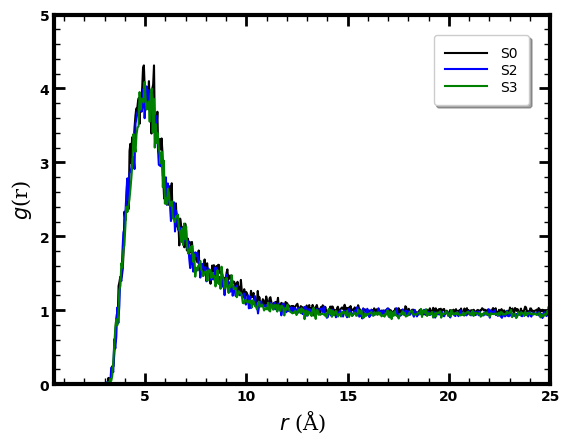

In [20]:
font1 = {'family':'serif','color':'black','size':15}
plt.plot(comRDF.bins, comRDF.rdf, label="S0",color='black')
# plt.plot(rdf_trp_trp_filtered.bins, rdf_trp_trp_filtered.rdf, label="S1", color='red')
plt.plot(rdf_trp_trp_filtered1.bins, rdf_trp_trp_filtered1.rdf, label="S2", color='blue')
plt.plot(rdf_trp_trp_filtered2.bins, rdf_trp_trp_filtered2.rdf, label="S3", color='green')

plt.xlabel(r"$r$ (Å)",fontdict=font1)
plt.ylabel(r"$g$(r)",fontdict=font1)
plt.legend(loc="best");

plt.figure(1,figsize = (5,4),dpi=2000)
border_line_width = 3
plt.gca().spines['top'].set_linewidth(border_line_width)
plt.gca().spines['right'].set_linewidth(border_line_width)
plt.gca().spines['bottom'].set_linewidth(border_line_width)
plt.gca().spines['left'].set_linewidth(border_line_width)

plt.xlim(0.5,25)
plt.ylim(0,5)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(axis='x', which='major', direction='in', length=8, width=2, color='black')
plt.tick_params(axis='y', which='major', direction='in', length=8, width=2, color='black')
plt.gca().tick_params(axis='both', which='minor', color='black', width=1, length=4, bottom=True, top=True, left=True, right=True, direction='in')
plt.minorticks_on()
plt.legend(loc="upper right", labelspacing=0.2, handlelength=3.0, handletextpad=1.0, borderaxespad=1.5, borderpad=0.8, fontsize=10, fancybox=True, shadow=True)
plt.savefig('rdf_all_sys.png',dpi= 1000) # Other extensions: png, svg
plt.grid(False)
plt.show()


/var/folders/jc/r1qz74_n1_9613zrlx8dzt4r0000gn/T/ipykernel_1055/890103789.py:118: RuntimeWarning: divide by zero encountered in scalar divide
  correlation /= N  # Normalize by total interactions


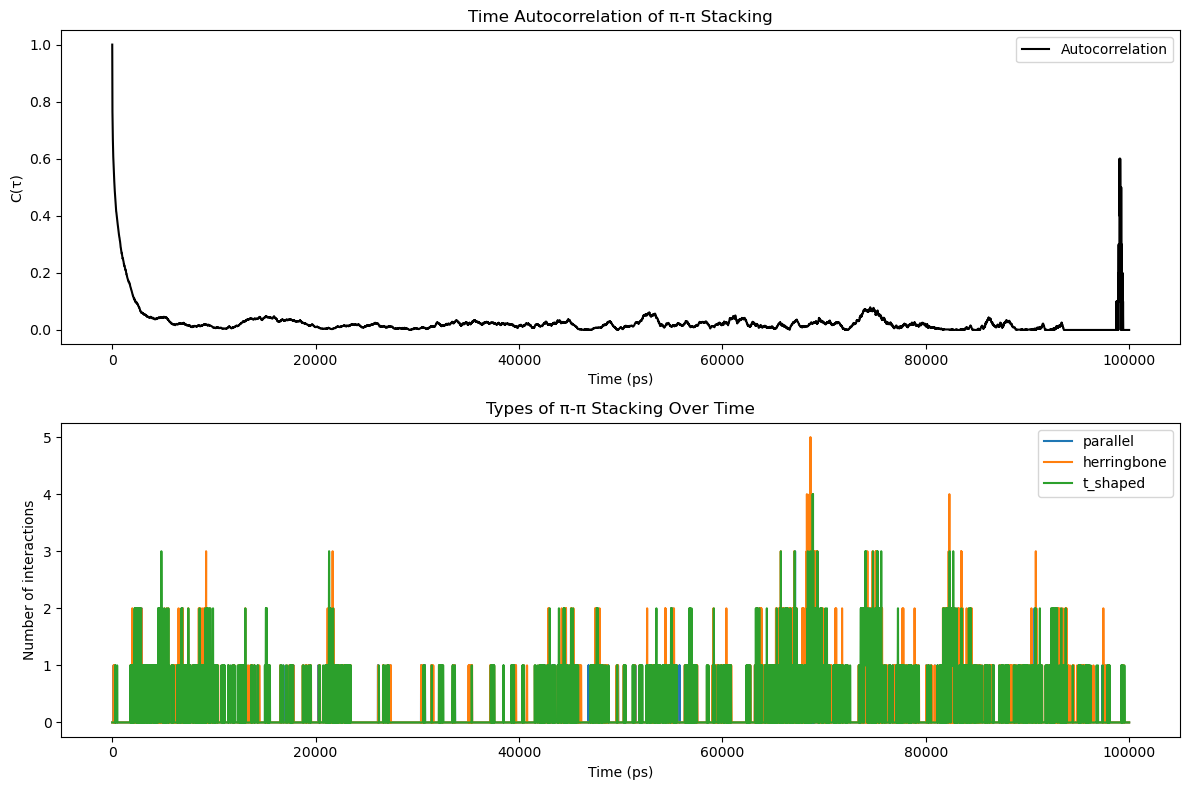

In [1]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis.distances import distance_array
from scipy.optimize import curve_fit

# Load trajectory
TPR = 'md_0_1_trp100mM_100ns.tpr'
XTC = 'md_0_100mM_center.xtc'
u = mda.Universe(TPR, XTC)
trp_aromatic = u.select_atoms("resname TRP and name C1 N1 C2 C3 C4 C5 C6 C7 C8")

# Parameters for π–π stacking
distance_cutoff = 6.5  # in Å

# Define angle ranges for different stacking types
parallel_angles = [(0, 30), (150, 180)]
herringbone_angles = [(30, 60), (120, 150)]
t_shaped_angles = [(60, 120)]

def calculate_angle(v1, v2):
    """Calculate angle between two vectors in degrees."""
    cos_theta = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    return np.degrees(np.arccos(np.clip(cos_theta, -1.0, 1.0)))

def check_stacking_type(angle):
    """
    Determine the type of π-π stacking based on the interplanar angle.
    Returns: 'parallel', 'herringbone', 't_shaped', or None
    """
    for low, high in parallel_angles:
        if low <= angle <= high:
            return 'parallel'
    for low, high in herringbone_angles:
        if low <= angle <= high:
            return 'herringbone'
    for low, high in t_shaped_angles:
        if low <= angle <= high:
            return 't_shaped'
    return None

def time_autocorrelation(universe, trp_atoms, dist_cutoff):
    """Calculate time autocorrelation function for π-π stacking."""
    beta_values = []
    frames = []
    stacking_types = {'parallel': [], 'herringbone': [], 't_shaped': []}
    
    for ts in universe.trajectory:
        positions = trp_atoms.positions
        n_trp = len(positions) // 9  # Each TRP has 9 atoms in the aromatic ring
        beta_frame = np.zeros((n_trp, n_trp), dtype=int)
        type_counts = {stype: 0 for stype in stacking_types}
        
        for i in range(n_trp):
            for j in range(i + 1, n_trp):
                pos1 = positions[i * 9:(i + 1) * 9]
                pos2 = positions[j * 9:(j + 1) * 9]
                
                # Calculate distance between centers of mass
                com1 = pos1.mean(axis=0)
                com2 = pos2.mean(axis=0)
                distance = np.linalg.norm(com1 - com2)
                
                if distance <= dist_cutoff:
                    # Calculate normal vectors using multiple atoms for better accuracy
                    v1 = pos1[2] - pos1[0]
                    v2 = pos1[4] - pos1[0]
                    normal1 = np.cross(v1, v2)
                    
                    v3 = pos2[2] - pos2[0]
                    v4 = pos2[4] - pos2[0]
                    normal2 = np.cross(v3, v4)
                    
                    # Calculate angle between planes
                    angle = calculate_angle(normal1, normal2)
                    
                    # Check stacking type
                    stack_type = check_stacking_type(angle)
                    if stack_type:
                        beta_frame[i, j] = 1
                        type_counts[stack_type] += 1
        
        beta_values.append(beta_frame)
        frames.append(ts.time)
        for stype in stacking_types:
            stacking_types[stype].append(type_counts[stype])
    
    beta_values = np.array(beta_values)
    n_frames = len(beta_values)
    
    # Compute time autocorrelation for stacking
    C_tau = np.zeros(n_frames)
    for tau in range(n_frames):
        correlation = 0
        count = 0
        for t in range(n_frames - tau):
            beta_t = beta_values[t]
            beta_tau = beta_values[t + tau]
            correlation += np.sum(beta_t * beta_tau)
            count += np.sum(beta_t)
        if count > 0:
            C_tau[tau] = correlation / count

    # Additional time autocorrelation analysis
    tau_max = 25  # Maximum time lag
    C_tau1 = []

    T = len(frames)  # Total number of frames
    N = np.sum(beta_values[0])  # Total interactions in first frame

    for tau in range(tau_max):
        correlation = 0
        for t in range(T - tau):
            beta_t = beta_values[t]
            beta_t_tau = beta_values[t + tau]
            correlation += np.sum(beta_t & beta_t_tau)  # Logical AND for overlap
        correlation /= (T - tau)  # Normalize by number of frames
        correlation /= N  # Normalize by total interactions
        C_tau1.append(correlation)

    C_tau1 = np.array(C_tau1)
    time1 = np.arange(tau_max) * universe.trajectory.dt  # Time axis based on trajectory time step

    return C_tau, time1, C_tau1, frames, stacking_types

# Compute time autocorrelation
C_tau, time1, C_tau1, frames, stacking_types = time_autocorrelation(u, trp_aromatic, distance_cutoff)

# Plot results
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(frames, C_tau, 'k-', label='Autocorrelation')
plt.xlabel('Time (ps)')
plt.ylabel('C(τ)')
plt.legend()
plt.title('Time Autocorrelation of π-π Stacking')

plt.subplot(2, 1, 2)
for stype, counts in stacking_types.items():
    plt.plot(frames, counts, label=stype)
plt.xlabel('Time (ps)')
plt.ylabel('Number of interactions')
plt.legend()
plt.title('Types of π-π Stacking Over Time')

plt.tight_layout()
plt.show()



Text(0.5, 1.0, 'Time Autocorrelation of π-π Stacking')

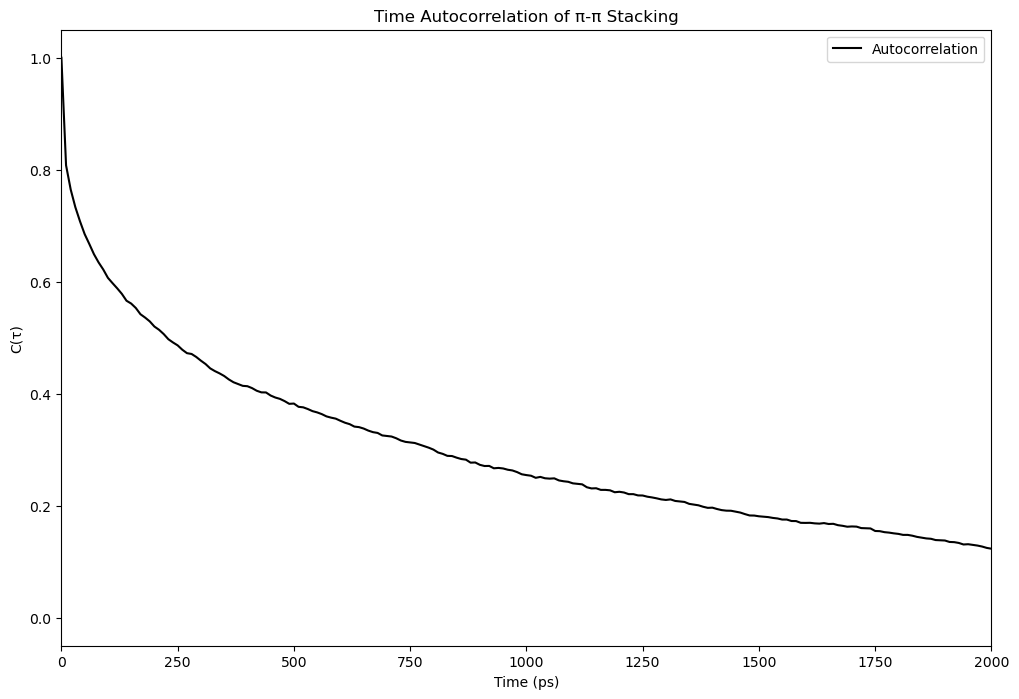

In [7]:
# Plot results
plt.figure(figsize=(12, 8))
plt.plot(frames, C_tau, 'k-', label='Autocorrelation')
plt.xlabel('Time (ps)')
plt.ylabel('C(τ)')
plt.xlim(0,2000)
plt.legend()
plt.title('Time Autocorrelation of π-π Stacking')

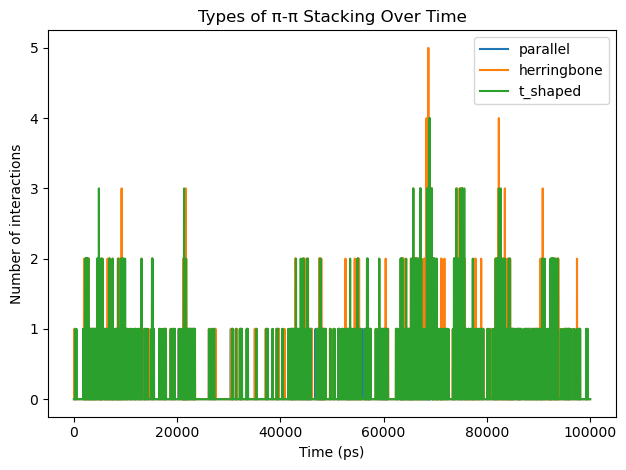

In [9]:

for stype, counts in stacking_types.items():
    plt.plot(frames, counts, label=stype)
plt.xlabel('Time (ps)')
plt.ylabel('Number of interactions')
plt.legend()
plt.title('Types of π-π Stacking Over Time')

plt.tight_layout()
plt.show()

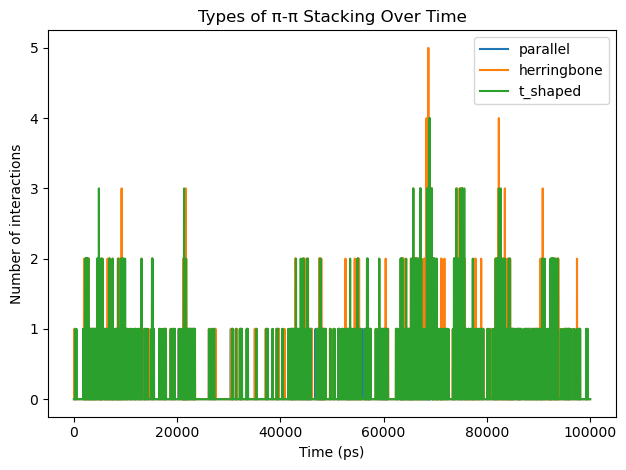

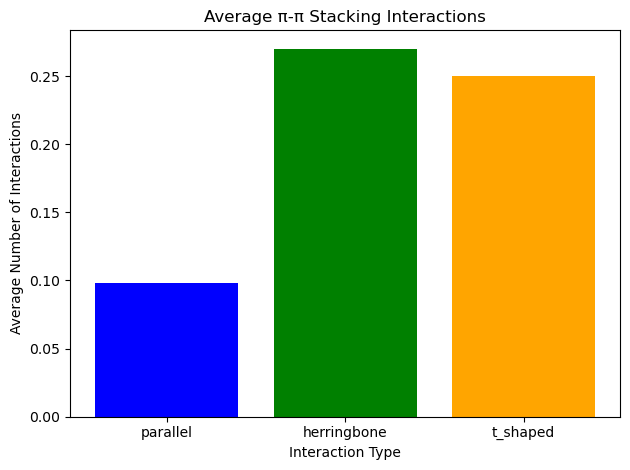

In [10]:
import numpy as np
import matplotlib.pyplot as plt


# Plot π-π stacking interactions over time
for stype, counts in stacking_types.items():
    plt.plot(frames, counts, label=stype)
plt.xlabel('Time (ps)')
plt.ylabel('Number of interactions')
plt.legend()
plt.title('Types of π-π Stacking Over Time')
plt.tight_layout()
plt.show()

# Calculate averages
averages = {stype: np.mean(counts) for stype, counts in stacking_types.items()}

# Bar plot of averages
plt.bar(averages.keys(), averages.values(), color=['blue', 'green', 'orange'])
plt.xlabel('Interaction Type')
plt.ylabel('Average Number of Interactions')
plt.title('Average π-π Stacking Interactions')
plt.tight_layout()
plt.show()


In [ ]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rdf
from itertools import combinations
from functools import reduce
import pandas as pd

import warnings
warnings.simplefilter("ignore", category=np.VisibleDeprecationWarning)

TPR = 'md_0_100ns_trp100mM-ta.tpr'
XTC = 'md_0_100ns_trp100mM-ta_pbc_center.xtc'

# Load the trajectory and topology
u = mda.Universe(TPR, XTC)

# Select TRP and TA atoms
trp = u.select_atoms("resname TRP")
ta = u.select_atoms("resname ta")

# Calculate the center of mass (COM) of TRP and TA molecules
trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
ta_coms = ta.center_of_mass(unwrap=True, compound="fragments")


final_clusters = []

for ts in u.trajectory[5000:]:

    clust_arr = np.zeros(8)
    # Calculate distances from TA to all TRPs and store them in dist1
    trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
    ta_coms = ta.center_of_mass(unwrap=True, compound="fragments")
    dist1 = []
    for i in trp_coms:
        dist1.append(np.linalg.norm(i-ta_coms[0]))
    #print(dist1)
    
    # Identify TRPs outside cutoff
    cutoff_1 = 12.0
    outside_trps_idxs = np.where(np.array(dist1) >= cutoff_1)[0]
    #print(outside_trps_idxs)
    
    # Identify cluster between only those TRPs outside TA
    outside_trps_pos = trp_coms[outside_trps_idxs]
    #print(outside_trps_pos)
    cutoff_2 = 7.5
    all_clust = []
    for i in range(0, len(outside_trps_idxs)-1):
        clust = [i]
        for j in range(i+1, len(outside_trps_idxs)):
            dist = np.linalg.norm(outside_trps_pos[i] - outside_trps_pos[j])
            if dist <= cutoff_2:
                clust.append(j)
        if (len(clust) > 1):
            all_clust.append(clust)
    print(all_clust)
    
    if (len(all_clust) > 1):
        i = 0
        j = 0
        while i < len(all_clust) - 1:        
            intersect_clust = all_clust[i]
            while len(intersect_clust) != 0 and i < (len(all_clust) - 1):
                i += 1 
                intersect_clust = np.intersect1d(intersect_clust, all_clust[i]) 
            all_list = [m for m in all_clust[j:i]]  
            union_clust = reduce(np.union1d, all_list) 
            clust_arr[len(union_clust) - 1] += 1
            final_clusters.append(clust_arr)
            j = i
        
    else:
        size = len(all_clust)
        if size == 0:
            clust_arr[0] += 1
            final_clusters.append(clust_arr)
        else:
            id = len(all_clust[0]) - 1
            clust_arr[id] += 1
            final_clusters.append(clust_arr)

final_clusters = np.array(final_clusters)

In [ ]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rdf
from itertools import combinations
from functools import reduce
import pandas as pd

import warnings
warnings.simplefilter("ignore", category=np.VisibleDeprecationWarning)

TPR = 'md_0_100ns_trp100mM-ta.tpr'
XTC = 'md_0_100ns_trp100mM-ta_pbc_center.xtc'

# Load the trajectory and topology
u = mda.Universe(TPR, XTC)

# Select TRP and TA atoms
trp = u.select_atoms("resname TRP")
# ta = u.select_atoms("resname ta")

# Calculate the center of mass (COM) of TRP and TA molecules
trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
ta_coms = ta.center_of_mass(unwrap=True, compound="fragments")

import warnings
warnings.simplefilter("ignore", category=np.VisibleDeprecationWarning)

TPR = 'md_0_1_trp100mM_100ns.tpr'
XTC = 'md_0_100mM_center.xtc'

# Load the trajectory and topology
u = mda.Universe(TPR, XTC)

# Select TRP and TA atoms
trp = u.select_atoms("resname TRP")
# ta = u.select_atoms("resname ta")

final_clusters = []

for ts in u.trajectory[5000:]:

    clust_arr = np.zeros(8)
    # Calculate distances from TA to all TRPs and store them in dist1
    trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
    cutoff_2 = 7.5
    all_clust = []
    for i in range(0, len(trp_coms)-1):
        clust = [i]
        for j in range(i+1, len(trp_coms)):
            dist = np.linalg.norm(trp_coms[i] - trp_coms[j])
            if dist <= cutoff_2:
                clust.append(j)
        if (len(clust) > 1):
            all_clust.append(clust)
    print(all_clust)
    
    if (len(all_clust) > 1):
        i = 0
        j = 0
        while i < len(all_clust) - 1:        
            intersect_clust = all_clust[i]
            while len(intersect_clust) != 0 and i < (len(all_clust) - 1):
                i += 1 
                intersect_clust = np.intersect1d(intersect_clust, all_clust[i]) 
            all_list = [m for m in all_clust[j:i]]  
            union_clust = reduce(np.union1d, all_list) 
            clust_arr[len(union_clust) - 1] += 1
            final_clusters.append(clust_arr)
            j = i
        
    else:
        size = len(all_clust)
        if size == 0:
            clust_arr[0] += 1
            final_clusters.append(clust_arr)
        else:
            id = len(all_clust[0]) - 1
            clust_arr[id] += 1
            final_clusters.append(clust_arr)

final_clusters = np.array(final_clusters)